# Question 1

## section 3

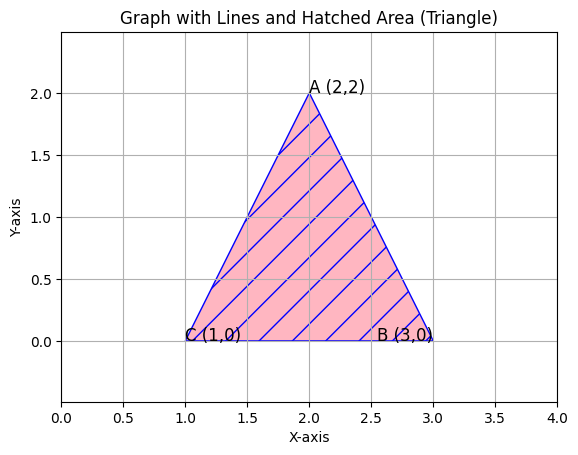

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the triangle
vertices = np.array([[1, 0], [3, 0], [2, 2]])

# Create a polygon based on the vertices
triangle = plt.Polygon(vertices, closed=True, fill=True, edgecolor='blue', facecolor='#FFB6C1', hatch='/', label='Area Inside Triangle')

# Create the plot
fig, ax = plt.subplots()

# Add the triangle to the plot
ax.add_patch(triangle)

# Set the labels for vertices
for (x, y), label in zip(vertices, ['C (1,0)', 'B (3,0)', 'A (2,2)']):
    ax.text(x, y, label, fontsize=12, ha='right' if x>2 else 'left')

# Set limits, grid and labels
ax.set_xlim(0, 4)
ax.set_ylim(-1, 3)
ax.set_aspect('equal', adjustable='datalim')
plt.grid(True)
ax.set_title('Graph with Lines and Hatched Area (Triangle)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()


### designing the network

In [ ]:
import numpy as np
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [ ]:
#define model for dataset
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([2, 1], 6)
  neur2 = McCulloch_Pitts_neuron([0, 1], 0)
  neur3 = McCulloch_Pitts_neuron([-2, 1], -2)
  neur5 = McCulloch_Pitts_neuron([-1, 3, -1], 2.5)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur5.model(np.array([z1, z2, z3]))

  return list([z4])

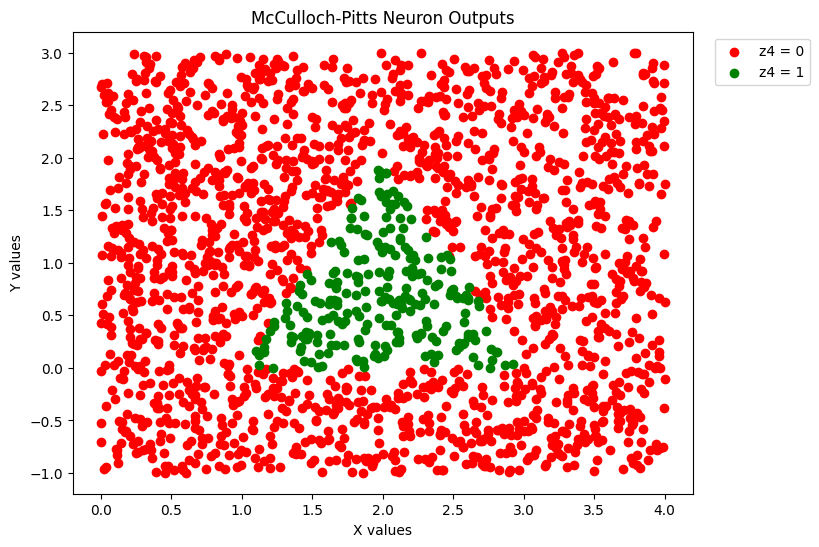

In [ ]:
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits
# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()


### changing the Activision function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts neuron with different activation functions
class McCulloch_Pitts_neuron():

    def __init__(self, weights, activation='threshold', threshold=0):
        self.weights = np.array(weights)
        self.activation = activation
        self.threshold = threshold

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def model(self, x):
        linear_output = self.weights @ x
        if self.activation == 'threshold':
            return 1 if linear_output >= self.threshold else 0
        elif self.activation == 'sigmoid':
            return self.sigmoid(linear_output)
        elif self.activation == 'tanh':
            return self.tanh(linear_output)
        elif self.activation == 'relu':
            return self.relu(linear_output)
        else:
            raise ValueError("Unsupported activation function")

# Define model for dataset
def Area(x, y, activation='threshold'):
    neur1 = McCulloch_Pitts_neuron([2, 1], activation=activation, threshold=6)
    neur2 = McCulloch_Pitts_neuron([0, 1], activation=activation, threshold=0)
    neur3 = McCulloch_Pitts_neuron([-2, 1], activation=activation, threshold=-2)
    neur5 = McCulloch_Pitts_neuron([-1, 3, -1], activation=activation, threshold=2.5)

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur5.model(np.array([z1, z2, z3]))

    return z4


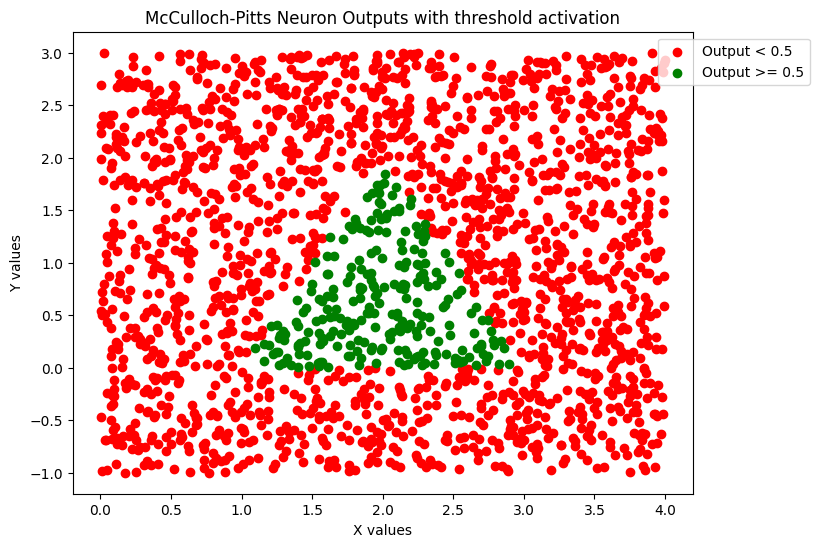

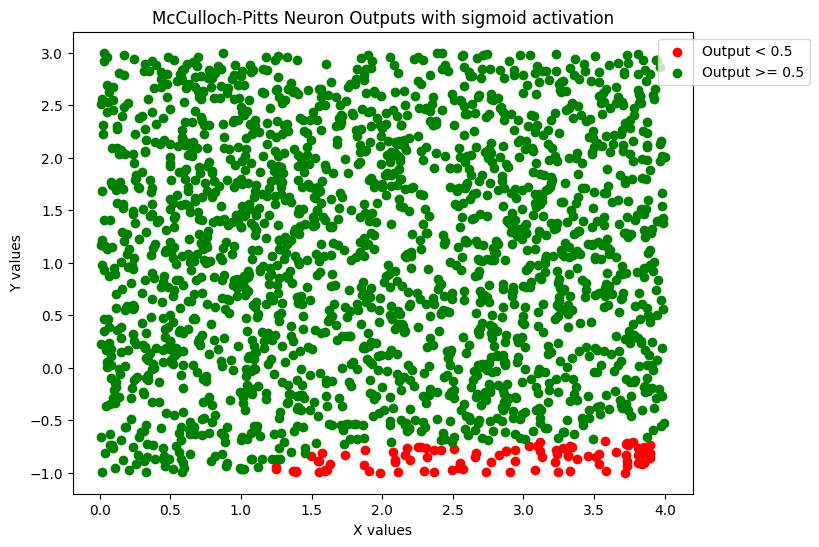

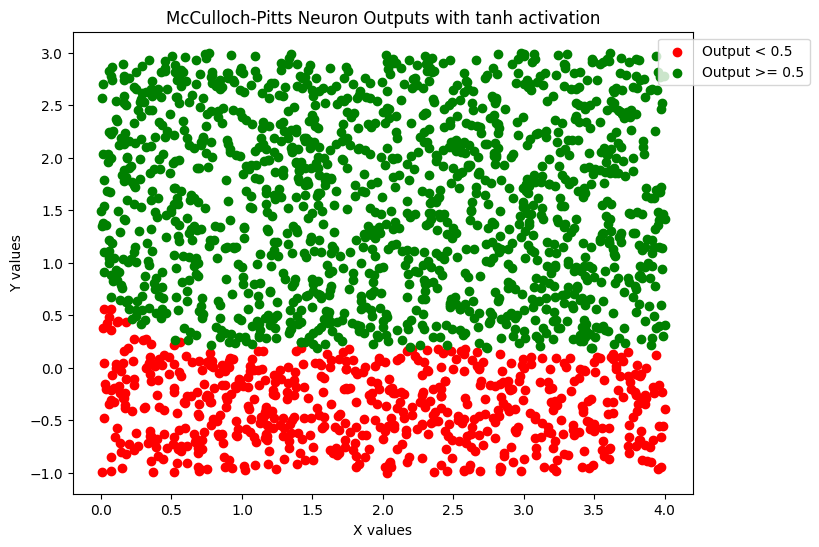

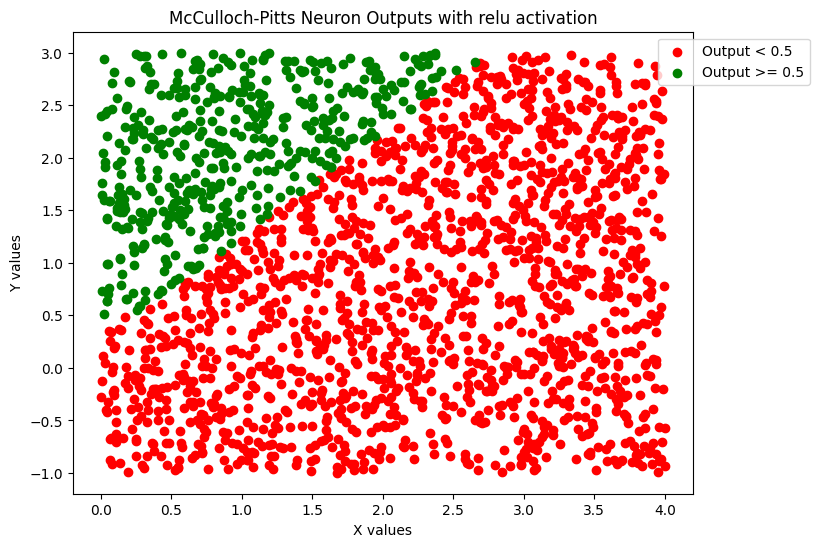

In [ ]:
def classify_and_plot(activation):
    num_points = 2000
    x_values = np.random.uniform(0, 4, num_points)
    y_values = np.random.uniform(-1, 3, num_points)

    red_points = []
    green_points = []

    for i in range(num_points):
        z4_value = Area(x_values[i], y_values[i], activation=activation)
        if z4_value < 0.5:
            red_points.append((x_values[i], y_values[i]))
        else:
            green_points.append((x_values[i], y_values[i]))

    red_x, red_y = zip(*red_points) if red_points else ([], [])
    green_x, green_y = zip(*green_points) if green_points else ([], [])

    plt.figure(figsize=(8, 6))
    plt.scatter(red_x, red_y, color='red', label='Output < 0.5')
    plt.scatter(green_x, green_y, color='green', label='Output >= 0.5')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'McCulloch-Pitts Neuron Outputs with {activation} activation')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()

classify_and_plot('threshold')
classify_and_plot('sigmoid')
classify_and_plot('tanh')
classify_and_plot('relu')


# Question 2

## section 1

### read the data

In [ ]:
# https://drive.google.com/file/d/1ITdSUr9PKmbnXcSS3WTUJ3yfGm4NFMAa/view?usp=sharing #Normal
# https://drive.google.com/file/d/10Ur5O5cRFLmCxFe8vQZ4CpqqWsoPn3yo/view?usp=sharing #Outer race
# https://drive.google.com/file/d/1v66H3jOylkorySkgR6GKT0X9MoNWZ-Qu/view?usp=sharing #Inner race
# https://drive.google.com/file/d/18rHozVxwXIqUOAQGal-icB0RrFDxPgdE/view?usp=sharing #Ball

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1ITdSUr9PKmbnXcSS3WTUJ3yfGm4NFMAa

!pip install --upgrade --no-cache-dir gdown
!gdown 10Ur5O5cRFLmCxFe8vQZ4CpqqWsoPn3yo

!pip install --upgrade --no-cache-dir gdown
!gdown 1v66H3jOylkorySkgR6GKT0X9MoNWZ-Qu

!pip install --upgrade --no-cache-dir gdown
!gdown 18rHozVxwXIqUOAQGal-icB0RrFDxPgdE

Downloading...
From (original): https://drive.google.com/uc?id=1ITdSUr9PKmbnXcSS3WTUJ3yfGm4NFMAa
From (redirected): https://drive.google.com/uc?id=1ITdSUr9PKmbnXcSS3WTUJ3yfGm4NFMAa&confirm=t&uuid=a8b14957-1183-4580-a4d3-76f73948b9fd
To: /content/normal99.mat
100% 15.5M/15.5M [00:00<00:00, 113MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=10Ur5O5cRFLmCxFe8vQZ4CpqqWsoPn3yo
From (redirected): https://drive.google.com/uc?id=10Ur5O5cRFLmCxFe8vQZ4CpqqWsoPn3yo&confirm=t&uuid=87f9e55e-4c64-4567-8d03-90c3256caf4e
To: /content/OR132.mat
100% 2.91M/2.91M [00:00<00:00, 156MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1v66H3jOylkorySkgR6GKT0X9MoNWZ-Qu
From (redirected): https://drive.google.com/uc?id=1v66H3jOylkorySkgR6GKT0X9MoNWZ-Qu&confirm=t&uuid=bb41544c-c88b-4370-95ec-01d122517d19
To: /content/IR107.mat
100% 2.93M/2.93M [00:00<00:00, 125MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=18rHozVxwXIqUOAQGal-icB0RrFDxPgdE
From (redir

In [ ]:
import scipy.io
import pandas as pd
import numpy as np
mat_data = scipy.io.loadmat('/content/normal99.mat')

normal_variables = ['X098_DE_time', 'X098_FE_time', 'X099_DE_time', 'X099_FE_time']

dfs = []
for i in normal_variables:
  data = mat_data[i]
  dfs.append(pd.DataFrame(data))
normal_df = pd.concat(dfs, axis=1, ignore_index=True)
normal_df.columns = normal_variables
# print(normal_df)
print(f'null items: \n {normal_df.isnull().sum()}')

null items: 
 X098_DE_time    1160
X098_FE_time    1160
X099_DE_time       0
X099_FE_time       0
dtype: int64


In [ ]:
mat_data = scipy.io.loadmat('/content/IR107.mat')

IR_fault_variables = ['X107_BA_time', 'X107_DE_time', 'X107_FE_time']
dfs = []
for i in IR_fault_variables:
  data = mat_data[i]
  dfs.append(pd.DataFrame(data))
IR_fault_df = pd.concat(dfs, axis=1, ignore_index=True)
IR_fault_df.columns = IR_fault_variables
# print(IR_fault_df)
print(f'null items: \n {IR_fault_df.isnull().sum()}')

null items: 
 X107_BA_time    0
X107_DE_time    0
X107_FE_time    0
dtype: int64


In [ ]:
mat_data = scipy.io.loadmat('/content/OR132.mat')

OR_fault_variables = ['X132_BA_time', 'X132_DE_time', 'X132_FE_time']
dfs = []
for i in OR_fault_variables:
  data = mat_data[i]
  dfs.append(pd.DataFrame(data))
OR_fault_df = pd.concat(dfs, axis=1, ignore_index=True)
OR_fault_df.columns = OR_fault_variables
# print(OR_fault_df)
print(f'null items: \n {OR_fault_df.isnull().sum()}')

null items: 
 X132_BA_time    0
X132_DE_time    0
X132_FE_time    0
dtype: int64


In [ ]:
mat_data = scipy.io.loadmat('/content/B120.mat')

B_fault_variables = ['X120_BA_time', 'X120_DE_time', 'X120_FE_time']
dfs = []
for i in B_fault_variables:
  data = mat_data[i]
  dfs.append(pd.DataFrame(data))
B_fault_df = pd.concat(dfs, axis=1, ignore_index=True)
B_fault_df.columns = B_fault_variables
# print(B_fault_df)
print(f'null items: \n {B_fault_df.isnull().sum()}')

null items: 
 X120_BA_time    0
X120_DE_time    0
X120_FE_time    0
dtype: int64


In [ ]:
normal_data = np.array(normal_df['X099_DE_time'])
num_sample = 200
size_sample = 300
normal_matrix = np.zeros((num_sample, size_sample))

for i in range(num_sample):
  start_index = i * size_sample
  end_index = start_index + size_sample
  normal_matrix[i] = normal_data[start_index : end_index]
# print(normal_matrix)
normal_matrix.shape

(200, 300)

In [ ]:
IR_fault_data = np.array(IR_fault_df['X107_DE_time'])

IR_fault_matrix = np.zeros((num_sample, size_sample))

for i in range(num_sample):
  start_index = i * size_sample
  end_index = start_index + size_sample
  IR_fault_matrix[i] = IR_fault_data[start_index : end_index]
# print(IR_fault_matrix)
IR_fault_matrix.shape

(200, 300)

In [ ]:
OR_fault_data = np.array(OR_fault_df['X132_DE_time'])

OR_fault_matrix = np.zeros((num_sample, size_sample))

for i in range(num_sample):
  start_index = i * size_sample
  end_index = start_index + size_sample
  OR_fault_matrix[i] = OR_fault_data[start_index : end_index]
# print(OR_fault_matrix)
OR_fault_matrix.shape

(200, 300)

In [ ]:
B_fault_data = np.array(B_fault_df['X120_DE_time'])

B_fault_matrix = np.zeros((num_sample, size_sample))

for i in range(num_sample):
  start_index = i * size_sample
  end_index = start_index + size_sample
  B_fault_matrix[i] = B_fault_data[start_index : end_index]
# print(B_fault_matrix)
B_fault_matrix.shape

(200, 300)

### make the datafram of normal and fault data

In [ ]:
mix_class_data = np.vstack((normal_matrix, IR_fault_matrix, OR_fault_matrix, B_fault_matrix))
print(mix_class_data)
mix_class_data.shape

[[ 0.06425354  0.06300185 -0.00438092 ...  0.11494708  0.06696554
   0.00104308]
 [-0.02524246  0.00250338  0.04568677 ...  0.01668923  0.02107015
   0.04234892]
 [ 0.03775938  0.00688431 -0.03755077 ...  0.113904    0.08866154
   0.03984554]
 ...
 [-0.10314631 -0.05246655  0.11597868 ... -0.04775593  0.07358311
  -0.20954132]
 [-0.13725768  0.31155058  0.09681134 ... -0.14294291 -0.23439389
   0.17656699]
 [ 0.15918643 -0.17396802 -0.05246655 ... -0.20385609 -0.23358172
   0.23618068]]


(800, 300)

### labels

In [ ]:
label_normal = np.zeros((num_sample,1))  # 0 label for NORMAL data
label_IR_fault = np.ones((num_sample,1))    # 1 label for IR fault data
label_OR_fault = 2*np.ones((num_sample,1))    # 2 label for OR fault data
label_B_fault = 3*np.ones((num_sample,1))    # 3 label for B fault data
mix_class_labels = np.vstack((label_normal, label_IR_fault, label_OR_fault, label_B_fault))
mix_class_labels.shape

(800, 1)

### feature extraction

In [ ]:
feature_std = np.std(mix_class_data, axis=1)

feature_peak = np.amax(mix_class_data, axis=1)

feature_mean = np.mean(mix_class_data, axis=1)

feature_abs_mean = np.mean(np.abs(mix_class_data), axis=1)

features_peak_to_peak = np.ptp(mix_class_data, axis = 1)

s = np.square(mix_class_data)
m = np.mean(s, axis = 1)
feature_rms = np.sqrt(m)

feature_crest_factor = feature_peak/feature_rms

feature_shape_factor = feature_rms/(np.mean(np.abs(mix_class_data), axis = 1))

In [ ]:
feature_list = [feature_std, feature_peak, feature_mean, feature_abs_mean, features_peak_to_peak, feature_rms, feature_crest_factor, feature_shape_factor]
len(feature_list)

8

### stack labels to data

In [ ]:
mix_class_data = np.hstack((mix_class_data, mix_class_labels))
mix_class_data.shape

(800, 301)

### making a dataframe consist of features only

In [ ]:
feature_data = np.zeros((800, 1))

for feature in feature_list:
    # Horizontally stack the current feature array with X
    feature_data = np.hstack((feature_data, feature.reshape(-1, 1)))

# Remove the first column of zeros
feature_data = feature_data[:, 1:]

print("Final feature data:")
print(feature_data)
feature_data.shape

Final feature data:
[[0.05840032 0.17982646 0.01546118 ... 0.0604123  2.97665326 1.31090191]
 [0.06137898 0.13977231 0.01468305 ... 0.06311079 2.2147134  1.20445202]
 [0.059578   0.16230277 0.01501753 ... 0.06144155 2.64158007 1.23984352]
 ...
 [0.13752658 0.40381373 0.00362284 ... 0.13757429 2.93524126 1.24615481]
 [0.15070719 0.39682902 0.00551088 ... 0.15080791 2.63135409 1.21469977]
 [0.15094207 0.39179353 0.00415509 ... 0.15099925 2.59467211 1.20756187]]


(800, 8)

### features + labels

In [ ]:
label_features = np.hstack((feature_data, mix_class_labels))
print(label_features)
label_features.shape

[[0.05840032 0.17982646 0.01546118 ... 2.97665326 1.31090191 0.        ]
 [0.06137898 0.13977231 0.01468305 ... 2.2147134  1.20445202 0.        ]
 [0.059578   0.16230277 0.01501753 ... 2.64158007 1.23984352 0.        ]
 ...
 [0.13752658 0.40381373 0.00362284 ... 2.93524126 1.24615481 3.        ]
 [0.15070719 0.39682902 0.00551088 ... 2.63135409 1.21469977 3.        ]
 [0.15094207 0.39179353 0.00415509 ... 2.59467211 1.20756187 3.        ]]


(800, 9)

### data shuffling

In [ ]:
from sklearn.utils import shuffle
shuffled_data = shuffle(label_features, random_state=54)
df = pd.DataFrame(shuffled_data)
df

,0,1,2,3,4,5,6,7,8
0,0.288245,1.142569,0.004263,0.214865,2.218214,0.288277,3.963445,1.341665,1.0
1,0.333805,1.376150,0.003448,0.238325,2.467065,0.333822,4.122402,1.400704,1.0
2,0.171944,0.464889,0.004329,0.141130,0.863018,0.171999,2.702867,1.218723,3.0
3,0.475053,1.836329,-0.000610,0.311425,3.664130,0.475053,3.865524,1.525419,2.0
4,0.520336,2.118154,0.008353,0.331079,4.446256,0.520403,4.070218,1.571838,2.0
...,...,...,...,...,...,...,...,...,...
795,0.158879,0.423631,0.004588,0.129620,0.804541,0.158945,2.665270,1.226237,3.0
796,0.062006,0.140815,0.012084,0.052013,0.303535,0.063172,2.229062,1.214559,0.0
797,0.135544,0.379286,0.005412,0.107195,0.748501,0.135652,2.796018,1.265474,3.0
798,0.321708,1.284212,0.005725,0.230807,2.335330,0.321759,3.991224,1.394059,1.0


In [ ]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X.columns = ['feature_std', 'feature_peak', 'feature_mean', 'feature_abs_mean', 'features_peak_to_peak', 'feature_rms', 'feature_crest_factor', 'feature_shape_factor']

In [ ]:
X


,feature_std,feature_peak,feature_mean,feature_abs_mean,features_peak_to_peak,feature_rms,feature_crest_factor,feature_shape_factor
0,0.288245,1.142569,0.004263,0.214865,2.218214,0.288277,3.963445,1.341665
1,0.333805,1.376150,0.003448,0.238325,2.467065,0.333822,4.122402,1.400704
2,0.171944,0.464889,0.004329,0.141130,0.863018,0.171999,2.702867,1.218723
3,0.475053,1.836329,-0.000610,0.311425,3.664130,0.475053,3.865524,1.525419
4,0.520336,2.118154,0.008353,0.331079,4.446256,0.520403,4.070218,1.571838
...,...,...,...,...,...,...,...,...
795,0.158879,0.423631,0.004588,0.129620,0.804541,0.158945,2.665270,1.226237
796,0.062006,0.140815,0.012084,0.052013,0.303535,0.063172,2.229062,1.214559
797,0.135544,0.379286,0.005412,0.107195,0.748501,0.135652,2.796018,1.265474
798,0.321708,1.284212,0.005725,0.230807,2.335330,0.321759,3.991224,1.394059


In [ ]:
y

0      1.0
1      1.0
2      3.0
3      2.0
4      2.0
      ... 
795    3.0
796    0.0
797    3.0
798    1.0
799    0.0
Name: 8, Length: 800, dtype: float64

## section 2

### MLP model 1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=54, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=54, shuffle=True)

In [ ]:
y_train.value_counts(), y_valid.value_counts(), y_test.value_counts()

(8
 1.0    128
 3.0    124
 0.0    118
 2.0    110
 Name: count, dtype: int64,
 8
 0.0    45
 2.0    41
 1.0    39
 3.0    35
 Name: count, dtype: int64,
 8
 2.0    49
 3.0    41
 0.0    37
 1.0    33
 Name: count, dtype: int64)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)
X_test_sc = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
## Activation Function
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

## Loss
def bce(y, y_hat):
    return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

## Accuracy
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat < t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

class MLP:
    def __init__(self, hidden_layer_sizes, hidden_activation='relu',
                 output_size=1, output_activation='sigmoid',
                 n_iter=1000, loss_fn=bce, eta=0.1, random_state=None):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.hidden_activation = hidden_activation
        self.output_size = output_size
        self.output_activation = output_activation
        self.n_iter = n_iter
        self.loss_fn = loss_fn
        self.eta = eta
        self.random_state = random_state
        np.random.seed(self.random_state)  # Set random seed

    def _init_weights(self):
        self.ws, self.bs = [], []  # Weight and bias lists for each layer
        self.as_ = [None] * len(self.hidden_layer_sizes)  # Initialize as_ with None
        all_layers = [self.input_size] + self.hidden_layer_sizes + [self.output_size]  # All layer sizes
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(all_layers[i-1], all_layers[i])  # Randomly initialize weights
            b = np.random.randn(all_layers[i])  # Randomly initialize biases
            self.ws.append(w)
            self.bs.append(b)

    def fit(self, X, y, X_val=None, y_val=None):  # Add optional validation data
        n, self.input_size = X.shape
        self._init_weights()
        train_losses = []
        val_losses = []
        train_accs = []
        val_accs = []
        for _ in range(self.n_iter):
            y_hat = self.predict(X)
            loss = self.loss_fn(y, y_hat)
            self._gradient_descent(X, y, y_hat)
            train_losses.append(loss)
            train_acc = accuracy(y, y_hat)
            train_accs.append(train_acc)
            if X_val is not None and y_val is not None:
                val_loss = self.loss_fn(y_val, self.predict(X_val))
                val_losses.append(val_loss)
                val_acc = accuracy(y_val, self.predict(X_val))
                val_accs.append(val_acc)
                print(f"Train Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
            else:
                print(f"Train Loss: {loss:.4f} | Train Acc: {train_acc:.4f}")
        if X_val is not None and y_val is not None:
            self.plot_history(train_losses, val_losses, train_accs, val_accs)
        else:
            self.plot_history(train_losses, None, train_accs, None)

    # Other methods remain unchanged...

    def plot_history(self, train_losses, val_losses=None, train_accs=None, val_accs=None):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_accs, label='Training Accuracy')
        if val_accs is not None:
            plt.plot(val_accs, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.show()
    def _gradient_descent(self, X, y, y_hat):
        delta = y_hat - y  # Compute difference between predicted and true values
        for j in range(len(self.ws)-1, 0, -1):
            w_grad = (self.as_[j-1].T @ delta) / len(y)  # Compute weight gradient
            b_grad = delta.mean(0)  # Compute bias gradient
            self.ws[j] -= self.eta * w_grad  # Update weights
            self.bs[j] -= self.eta * b_grad  # Update biases
            delta = (delta @ self.ws[j].T) * (self._activation_derivative(self.hs[j-1], self.hidden_activation))

    def predict(self, X):
        self.hs = []  # Hidden layer outputs
        self.as_ = []  # Activation function outputs
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = self.as_[i-1].copy() if i>0 else X.copy()  # Input to the hidden layer
            self.hs.append(a @ w + b)  # Compute hidden layer output
            self.as_.append(self._activation_function(self.hs[i], self.hidden_activation))  # Apply activation function
        y = self._activation_function(self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation)  # Output layer activation
        return y

    def _activation_function(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)  # ReLU activation
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")

    def _activation_derivative(self, x, activation):
        if activation == 'relu':
            return np.where(x > 0, 1, 0)  # Derivative of ReLU activation
        elif activation == 'sigmoid':
            sigmoid = self._activation_function(x, 'sigmoid')
            return sigmoid * (1 - sigmoid)  # Derivatتive of Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")


In [ ]:
X_train_sc.shape, y_train.shape, X_val_sc.shape, y_val.shape, X_test_sc.shape, y_test.shape

((480, 8), (480,), (121, 8), (121, 4), (160, 8), (160,))

In [ ]:
mlp_net1 = MLP(hidden_layer_sizes=[4,5], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=700, loss_fn=bce, eta=0.05, random_state=54)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

train_labels_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
validate_labels_onehot = encoder.fit_transform(y_valid.reshape(-1, 1)).toarray()
test_labels_onehot = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
X_train_sc.shape, train_labels_onehot.shape, X_val_sc.shape, validate_labels_onehot.shape, X_test_sc.shape, test_labels_onehot.shape

((480, 8), (480, 4), (121, 8), (160, 4), (160, 8), (160, 4))

Train Loss: 2.0330 | Train Acc: 2.3625 | Val Loss: 1.3815 | Val Acc: 2.9562
Train Loss: 1.3278 | Train Acc: 2.8917 | Val Loss: 1.0236 | Val Acc: 2.9000
Train Loss: 1.0062 | Train Acc: 2.8375 | Val Loss: 0.7372 | Val Acc: 2.8687
Train Loss: 0.7567 | Train Acc: 2.8104 | Val Loss: 0.5662 | Val Acc: 2.7938
Train Loss: 0.6170 | Train Acc: 2.6396 | Val Loss: 0.5327 | Val Acc: 2.9188
Train Loss: 0.5881 | Train Acc: 2.7854 | Val Loss: 0.5146 | Val Acc: 2.9312
Train Loss: 0.5663 | Train Acc: 2.8021 | Val Loss: 0.4972 | Val Acc: 2.9688
Train Loss: 0.5464 | Train Acc: 2.8208 | Val Loss: 0.4811 | Val Acc: 2.9750
Train Loss: 0.5279 | Train Acc: 2.8292 | Val Loss: 0.4662 | Val Acc: 2.9937
Train Loss: 0.5108 | Train Acc: 2.8479 | Val Loss: 0.4524 | Val Acc: 2.9937
Train Loss: 0.4949 | Train Acc: 2.8604 | Val Loss: 0.4395 | Val Acc: 3.0375
Train Loss: 0.4802 | Train Acc: 2.8729 | Val Loss: 0.4276 | Val Acc: 3.0750
Train Loss: 0.4666 | Train Acc: 2.9083 | Val Loss: 0.4166 | Val Acc: 3.0938
Train Loss: 

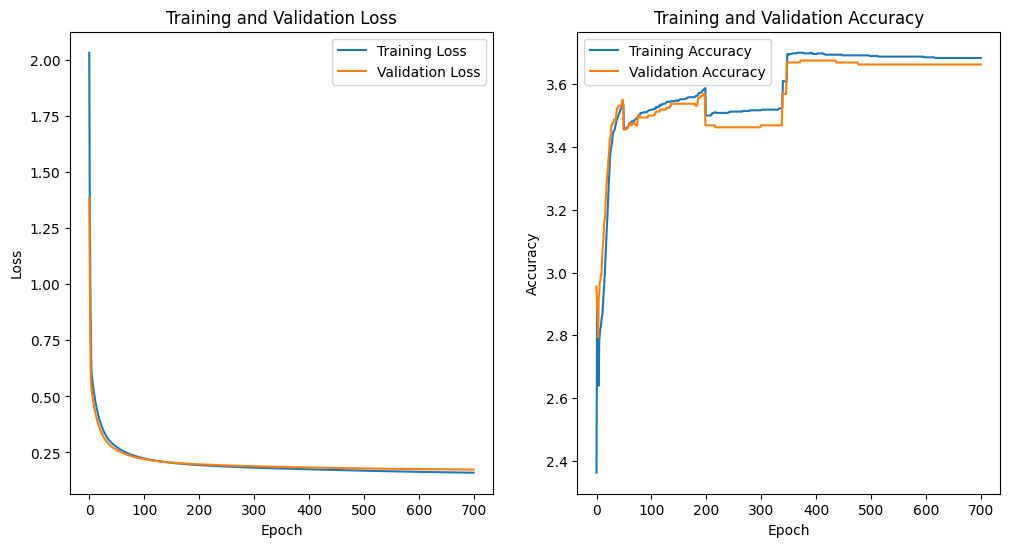

In [ ]:
mlp_net1.fit(X_train_sc, train_labels_onehot, X_valid_sc, validate_labels_onehot)

In [ ]:
y_hat = mlp_net1.predict(X_test_sc)
y_hat = np.argmax(y_hat, axis=1)
test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
print(f"actuall labels: \n {test_labels_onehot} \n predicted labels:\n {y_hat}")

actuall labels: 
 [2 3 3 2 0 2 0 2 1 0 0 1 2 2 2 0 2 3 3 3 1 0 2 0 2 0 2 2 2 3 3 2 3 3 0 3 0
 1 3 1 3 0 1 0 3 3 3 3 3 0 3 1 1 2 0 2 1 3 1 1 2 3 3 1 0 1 3 0 0 1 2 0 3 0
 2 1 1 2 1 0 3 2 1 2 1 2 2 1 0 3 2 1 2 0 0 0 1 1 0 3 0 3 1 3 3 0 1 2 2 0 3
 1 0 0 2 3 2 0 2 0 1 2 2 2 2 2 2 3 3 3 0 3 2 1 3 2 2 3 2 0 0 0 3 3 2 2 2 2
 1 2 1 1 1 2 0 1 3 3 2 2] 
 predicted labels:
 [2 3 3 2 0 1 0 2 2 0 0 1 2 2 2 0 2 3 3 3 1 0 2 0 2 0 2 2 2 3 3 2 3 3 0 3 0
 2 3 2 3 0 2 0 3 3 3 3 3 0 3 2 1 2 0 2 2 3 2 2 2 3 3 1 0 2 3 0 0 2 2 0 3 0
 2 1 2 2 2 0 3 2 2 2 2 2 2 1 0 3 2 1 2 0 0 0 2 1 0 3 0 3 2 3 3 0 2 2 2 0 3
 2 0 0 2 3 2 0 2 0 1 2 2 2 2 2 2 3 3 3 0 3 2 2 3 2 2 3 2 0 0 0 3 3 2 2 2 2
 1 2 2 2 1 2 0 2 3 3 2 2]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.92      0.33      0.49        33
           2       0.69      0.98      0.81        49
           3       1.00      1.00      1.00        41

    accuracy                           0.86       160
   macro avg       0.90      0.83      0.82       160
weighted avg       0.89      0.86      0.84       160



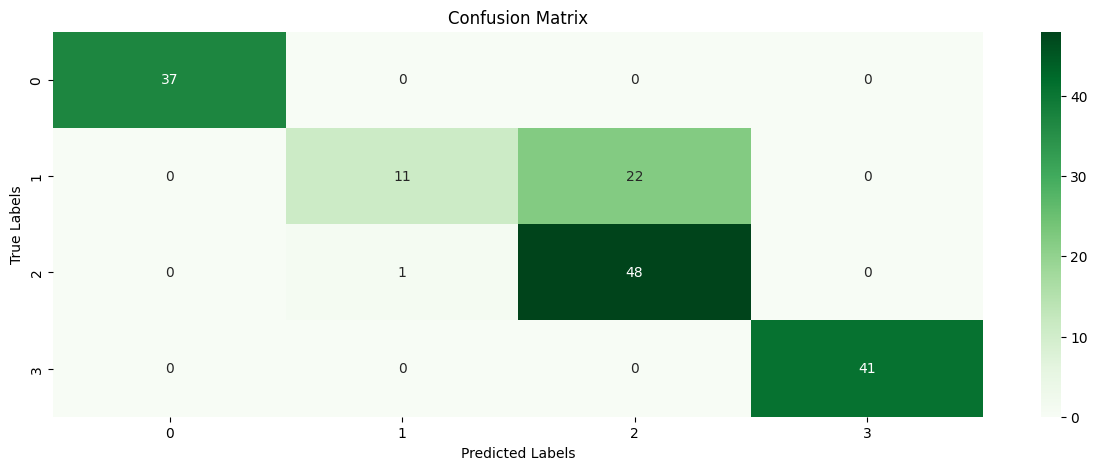

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(test_labels_onehot, y_hat)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

## section 3

### MLP model 2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=54, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=54, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)
X_test_sc = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
mlp_net2 = MLP(hidden_layer_sizes=[4,5], hidden_activation='sigmoid', output_size=4, output_activation='sigmoid', n_iter=700, loss_fn=mse, eta=0.05, random_state=54)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

train_labels_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
validate_labels_onehot = encoder.fit_transform(y_valid.reshape(-1, 1)).toarray()
test_labels_onehot = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

Train Loss: 0.2331 | Train Acc: 2.4583 | Val Loss: 0.2298 | Val Acc: 2.5125
Train Loss: 0.2304 | Train Acc: 2.4583 | Val Loss: 0.2274 | Val Acc: 2.5125
Train Loss: 0.2278 | Train Acc: 2.4583 | Val Loss: 0.2251 | Val Acc: 2.5125
Train Loss: 0.2255 | Train Acc: 2.4583 | Val Loss: 0.2229 | Val Acc: 2.6313
Train Loss: 0.2233 | Train Acc: 2.5625 | Val Loss: 0.2209 | Val Acc: 3.0063
Train Loss: 0.2212 | Train Acc: 2.9688 | Val Loss: 0.2190 | Val Acc: 3.0000
Train Loss: 0.2193 | Train Acc: 3.0000 | Val Loss: 0.2173 | Val Acc: 3.0000
Train Loss: 0.2175 | Train Acc: 3.0000 | Val Loss: 0.2157 | Val Acc: 3.0000
Train Loss: 0.2158 | Train Acc: 3.0000 | Val Loss: 0.2142 | Val Acc: 3.0000
Train Loss: 0.2143 | Train Acc: 3.0000 | Val Loss: 0.2128 | Val Acc: 3.0000
Train Loss: 0.2128 | Train Acc: 3.0000 | Val Loss: 0.2115 | Val Acc: 3.0000
Train Loss: 0.2115 | Train Acc: 3.0000 | Val Loss: 0.2103 | Val Acc: 3.0000
Train Loss: 0.2103 | Train Acc: 3.0000 | Val Loss: 0.2091 | Val Acc: 3.0000
Train Loss: 

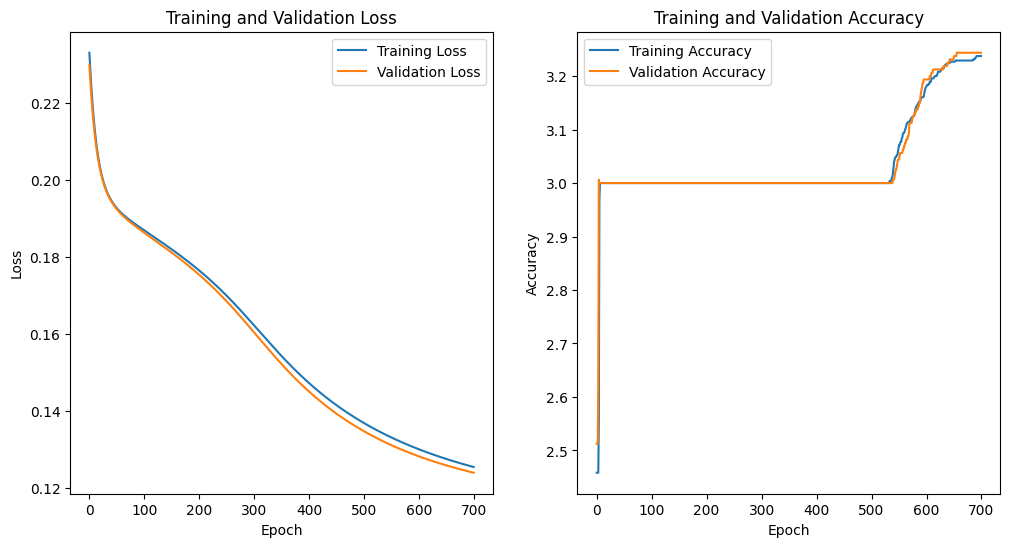

In [ ]:
mlp_net2.fit(X_train_sc, train_labels_onehot, X_valid_sc, validate_labels_onehot)

In [ ]:
y_hat = mlp_net2.predict(X_test_sc)
y_hat = np.argmax(y_hat, axis=1)
test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
print(f"actuall labels: \n {test_labels_onehot} \n predicted labels:\n {y_hat}")

actuall labels: 
 [2 3 3 2 0 2 0 2 1 0 0 1 2 2 2 0 2 3 3 3 1 0 2 0 2 0 2 2 2 3 3 2 3 3 0 3 0
 1 3 1 3 0 1 0 3 3 3 3 3 0 3 1 1 2 0 2 1 3 1 1 2 3 3 1 0 1 3 0 0 1 2 0 3 0
 2 1 1 2 1 0 3 2 1 2 1 2 2 1 0 3 2 1 2 0 0 0 1 1 0 3 0 3 1 3 3 0 1 2 2 0 3
 1 0 0 2 3 2 0 2 0 1 2 2 2 2 2 2 3 3 3 0 3 2 1 3 2 2 3 2 0 0 0 3 3 2 2 2 2
 1 2 1 1 1 2 0 1 3 3 2 2] 
 predicted labels:
 [2 0 0 2 0 2 0 2 1 0 0 1 2 2 2 0 2 0 0 0 1 0 2 0 2 0 2 2 2 3 3 2 0 3 0 0 0
 1 0 1 0 0 1 0 0 0 3 0 0 0 0 1 1 2 0 2 1 3 1 1 2 0 0 1 0 1 0 0 0 1 2 0 0 0
 2 1 1 2 1 0 3 2 1 2 1 2 2 1 0 0 2 1 2 0 0 0 1 1 0 0 0 0 1 0 0 0 1 2 2 0 0
 1 0 0 2 0 2 0 2 0 1 2 2 2 2 2 2 3 0 0 0 0 2 2 0 2 2 0 2 0 0 0 0 0 2 2 2 2
 1 2 2 2 1 2 0 2 0 0 2 2]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        37
           1       1.00      0.88      0.94        33
           2       0.92      1.00      0.96        49
           3       1.00      0.17      0.29        41

    accuracy                           0.76       160
   macro avg       0.86      0.76      0.72       160
weighted avg       0.87      0.76      0.72       160



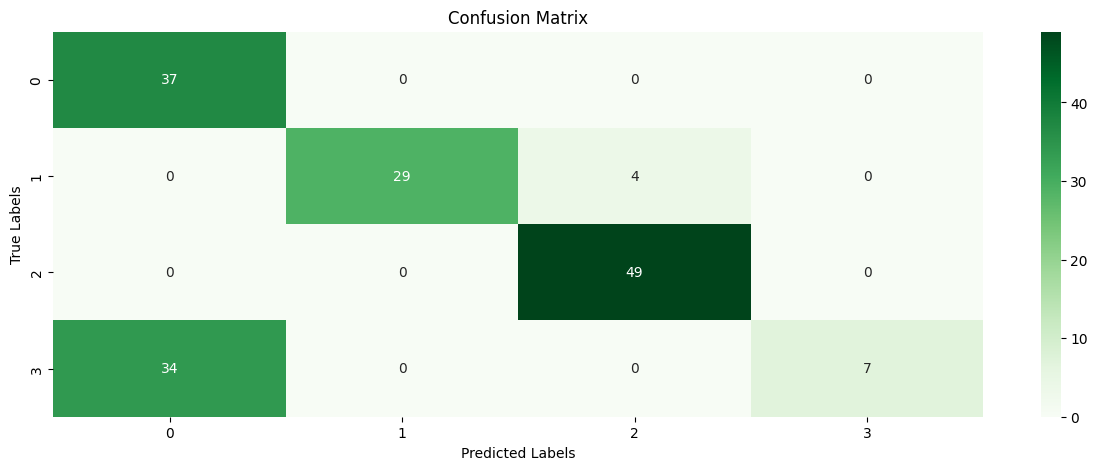

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(test_labels_onehot, y_hat)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

### MLP model 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=54, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=54, shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)
X_test_sc = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
mlp_net3 = MLP(hidden_layer_sizes=[5,6], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=mse, eta=0.05, random_state=54)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

train_labels_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
validate_labels_onehot = encoder.fit_transform(y_valid.reshape(-1, 1)).toarray()
test_labels_onehot = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

Train Loss: 0.3442 | Train Acc: 2.3729 | Val Loss: 0.3195 | Val Acc: 2.3750
Train Loss: 0.3156 | Train Acc: 2.4000 | Val Loss: 0.3050 | Val Acc: 2.3438
Train Loss: 0.2992 | Train Acc: 2.3708 | Val Loss: 0.2945 | Val Acc: 2.4188
Train Loss: 0.2879 | Train Acc: 2.4250 | Val Loss: 0.2847 | Val Acc: 2.5187
Train Loss: 0.2777 | Train Acc: 2.5583 | Val Loss: 0.2755 | Val Acc: 2.5562
Train Loss: 0.2681 | Train Acc: 2.5875 | Val Loss: 0.2668 | Val Acc: 2.5438
Train Loss: 0.2591 | Train Acc: 2.5875 | Val Loss: 0.2580 | Val Acc: 2.5312
Train Loss: 0.2502 | Train Acc: 2.5708 | Val Loss: 0.2480 | Val Acc: 2.5375
Train Loss: 0.2403 | Train Acc: 2.5625 | Val Loss: 0.2360 | Val Acc: 2.5375
Train Loss: 0.2289 | Train Acc: 2.5312 | Val Loss: 0.2224 | Val Acc: 2.5125
Train Loss: 0.2167 | Train Acc: 2.5229 | Val Loss: 0.2096 | Val Acc: 2.4813
Train Loss: 0.2054 | Train Acc: 2.5104 | Val Loss: 0.1993 | Val Acc: 2.4625
Train Loss: 0.1964 | Train Acc: 2.5250 | Val Loss: 0.1916 | Val Acc: 2.4875
Train Loss: 

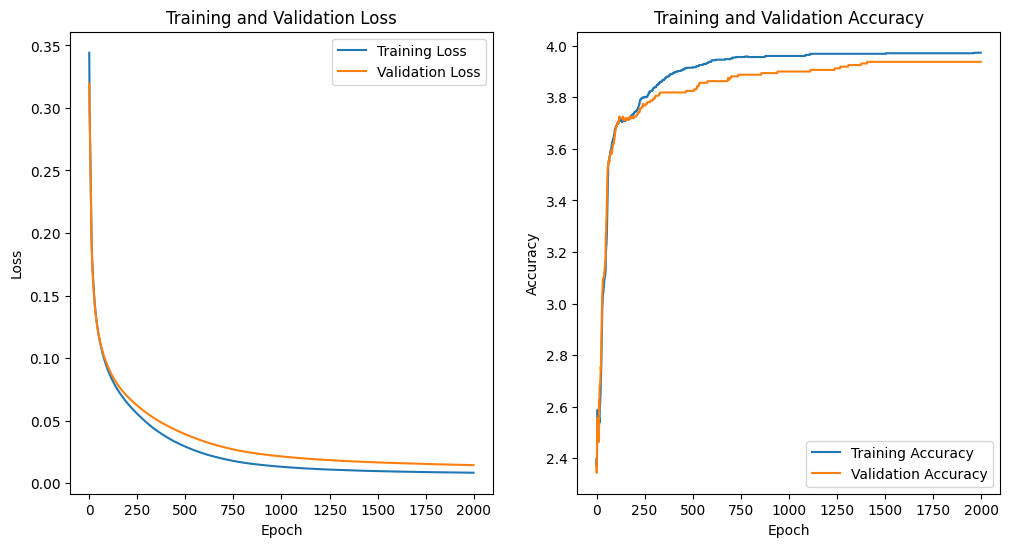

In [ ]:
mlp_net3.fit(X_train_sc, train_labels_onehot, X_valid_sc, validate_labels_onehot)

In [ ]:
y_hat = mlp_net3.predict(X_test_sc)
y_hat = np.argmax(y_hat, axis=1)
test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
print(f"actuall labels: \n {test_labels_onehot} \n predicted labels:\n {y_hat}")

actuall labels: 
 [2 3 3 2 0 2 0 2 1 0 0 1 2 2 2 0 2 3 3 3 1 0 2 0 2 0 2 2 2 3 3 2 3 3 0 3 0
 1 3 1 3 0 1 0 3 3 3 3 3 0 3 1 1 2 0 2 1 3 1 1 2 3 3 1 0 1 3 0 0 1 2 0 3 0
 2 1 1 2 1 0 3 2 1 2 1 2 2 1 0 3 2 1 2 0 0 0 1 1 0 3 0 3 1 3 3 0 1 2 2 0 3
 1 0 0 2 3 2 0 2 0 1 2 2 2 2 2 2 3 3 3 0 3 2 1 3 2 2 3 2 0 0 0 3 3 2 2 2 2
 1 2 1 1 1 2 0 1 3 3 2 2] 
 predicted labels:
 [2 3 3 2 0 1 0 2 1 0 3 1 2 2 2 0 2 3 3 3 1 0 2 0 2 0 2 2 2 3 3 2 3 3 0 3 0
 1 3 1 3 0 1 0 3 3 3 3 3 0 3 1 1 2 0 2 1 3 1 1 2 3 3 1 0 1 3 0 0 1 2 0 3 0
 2 1 1 2 1 0 3 2 1 2 1 2 2 1 0 3 2 1 2 0 0 0 1 1 0 3 0 3 1 3 3 0 1 2 2 0 3
 1 0 0 2 3 2 0 2 0 1 2 2 2 2 2 2 3 3 3 0 3 2 1 3 2 2 3 2 0 0 0 3 3 2 2 2 2
 1 2 1 1 1 2 0 1 3 3 2 2]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        33
           2       1.00      0.98      0.99        49
           3       0.98      1.00      0.99        41

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



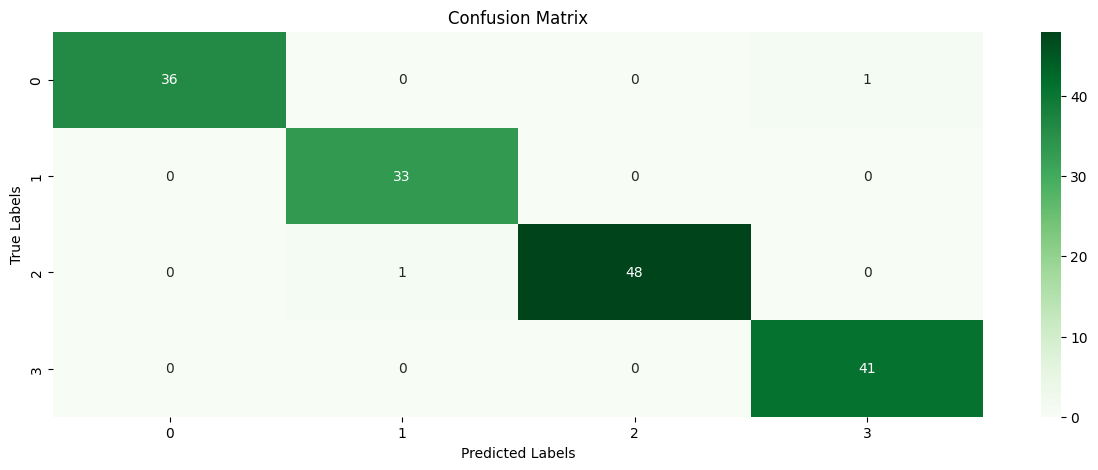

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(test_labels_onehot, y_hat)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

## section 4

In [ ]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X.columns = ['feature_std', 'feature_peak', 'feature_mean', 'feature_abs_mean', 'features_peak_to_peak', 'feature_rms', 'feature_crest_factor', 'feature_shape_factor']
X.shape, y.shape

((800, 8), (800,))

In [ ]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.model_selection import KFold
# import numpy as np
# import matplotlib.pyplot as plt


# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# encoder = OneHotEncoder()
# y = y.to_numpy()
# y_onehot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# hidden_layer_sizes = [4, 5]
# hidden_activation = 'relu'
# output_size = y_onehot.shape[1]  # Number of classes
# output_activation = 'sigmoid'
# n_iter = 1000
# loss_fn = bce
# eta = 0.05
# random_state = 54

# kf = KFold(n_splits=10, shuffle=True, random_state=random_state)

# train_accuracies = []
# test_accuracies = []

# for train_index, test_index in kf.split(X_scaled):
#     X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
#     y_train_fold, y_test_fold = y_onehot[train_index], y_onehot[test_index]

#     mlp_net = MLP(hidden_layer_sizes=hidden_layer_sizes, hidden_activation=hidden_activation,
#                   output_size=output_size, output_activation=output_activation,
#                   n_iter=n_iter, loss_fn=loss_fn, eta=eta, random_state=random_state)

#     mlp_net.fit(X_train_fold, y_train_fold)

#     y_train_pred = mlp_net.predict(X_train_fold)
#     y_test_pred = mlp_net.predict(X_test_fold)

#     train_acc = accuracy(np.argmax(y_train_fold, axis=1), np.argmax(y_train_pred, axis=1))
#     test_acc = accuracy(np.argmax(y_test_fold, axis=1), np.argmax(y_test_pred, axis=1))

#     train_accuracies.append(train_acc)
#     test_accuracies.append(test_acc)

#     print(f"Fold Training Accuracy: {train_acc:.4f}, Fold Test Accuracy: {test_acc:.4f}")

# avg_train_acc = np.mean(train_accuracies)
# avg_test_acc = np.mean(test_accuracies)

# print(f"Average Training Accuracy: {avg_train_acc:.4f}")
# print(f"Average Test Accuracy: {avg_test_acc:.4f}")


Cross-validation scores: [1.     1.     1.     1.     0.9875 1.     1.     1.     1.     1.    ]
Mean cross-validation score: 0.99875


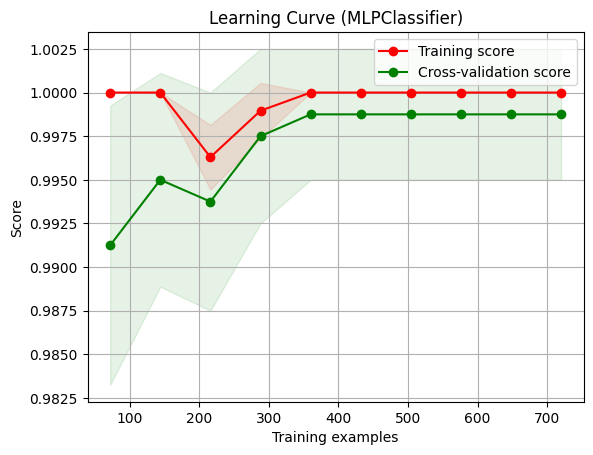

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000)

kf = KFold(n_splits=10)

scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

scores = np.array(scores)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

train_sizes, train_scores, test_scores = learning_curve(
    mlp, X_scaled, y, cv=kf, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (MLPClassifier)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


# Question 3

## section 1

### read the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://drive.google.com/file/d/19EH6i956ojzcvkem33Wg7Avk19C9uPs_/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 19EH6i956ojzcvkem33Wg7Avk19C9uPs_

Downloading...
From: https://drive.google.com/uc?id=19EH6i956ojzcvkem33Wg7Avk19C9uPs_
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 13.4MB/s]


In [ ]:
data = pd.read_csv('/content/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### splitting the data

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data, random_state=54)
X = data.drop(['Drug'], axis = 1)
y = data['Drug']
X.shape, y.shape

((200, 5), (200,))

In [ ]:
y.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=54)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 5), (40, 5), (160,), (40,))

In [ ]:
y_train.value_counts()

Drug
drugY    73
drugX    43
drugA    18
drugB    13
drugC    13
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Drug
drugY    18
drugX    11
drugA     5
drugB     3
drugC     3
Name: count, dtype: int64

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import KFold, cross_val_score

# kf = KFold(n_splits=5, shuffle=True, random_state=54)

# model = DecisionTreeClassifier(random_state=54)

# scores = cross_val_score(model, X, y, cv=kf)

# print("Cross-validation scores:", scores)
# print("Average cross-validation score:", scores.mean())

In [ ]:
# from sklearn.model_selection import LeaveOneOut, cross_val_score

# loo = LeaveOneOut()
# scores = cross_val_score(model, X, y, cv=loo)

In [ ]:
# from sklearn.utils import shuffle
# data = shuffle(data, random_state=54)

# test_size = 0.2
# border_idx = int((1-test_size) * len(data))

# X_train = data.drop(['Drug'], axis = 1)[:border_idx]
# X_test = data.drop(['Drug'], axis = 1)[border_idx:]
# y_train = data['Drug'][:border_idx]
# y_test = data['Drug'][border_idx:]

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

### encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 179 to 111
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

def encode_labels(train, test, columns):
    for col in columns:
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])
        label_encoders[col] = le
    return train, test

categorical_columns = ['Sex', 'BP', 'Cholesterol']
X_train, X_test = encode_labels(X_train, X_test, categorical_columns)

le_drug = LabelEncoder()
y_train = le_drug.fit_transform(y_train)
y_test = le_drug.transform(y_test)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (160, 5) (160,)
Test set shape: (40, 5) (40,)


In [ ]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
20,57,1,1,1,19.128
199,40,0,1,1,11.349
11,34,0,0,1,19.199
142,60,1,0,1,8.621
17,43,1,0,0,13.972
...,...,...,...,...,...
133,24,1,2,0,25.786
19,32,0,0,1,25.974
182,20,0,1,1,11.686
74,31,1,0,1,17.069


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

### building the model

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier( random_state = 54)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print(f"actuall labels: \n {y_test} \n predicted labels:\n {y_pred}")

actuall labels: 
 [4 4 1 4 0 4 3 3 3 0 0 3 4 2 1 4 4 3 4 3 4 4 0 0 2 4 2 4 4 3 3 4 4 4 3 4 3
 3 4 1] 
 predicted labels:
 [4 4 1 4 0 4 3 3 3 0 0 3 4 2 0 4 4 3 4 3 4 4 0 0 2 4 2 4 4 3 3 4 4 4 3 4 3
 3 4 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



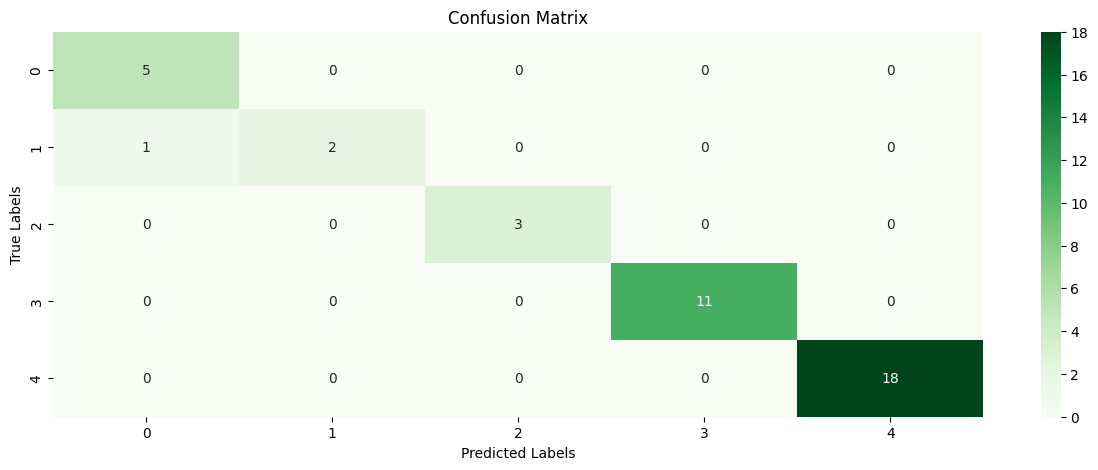

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

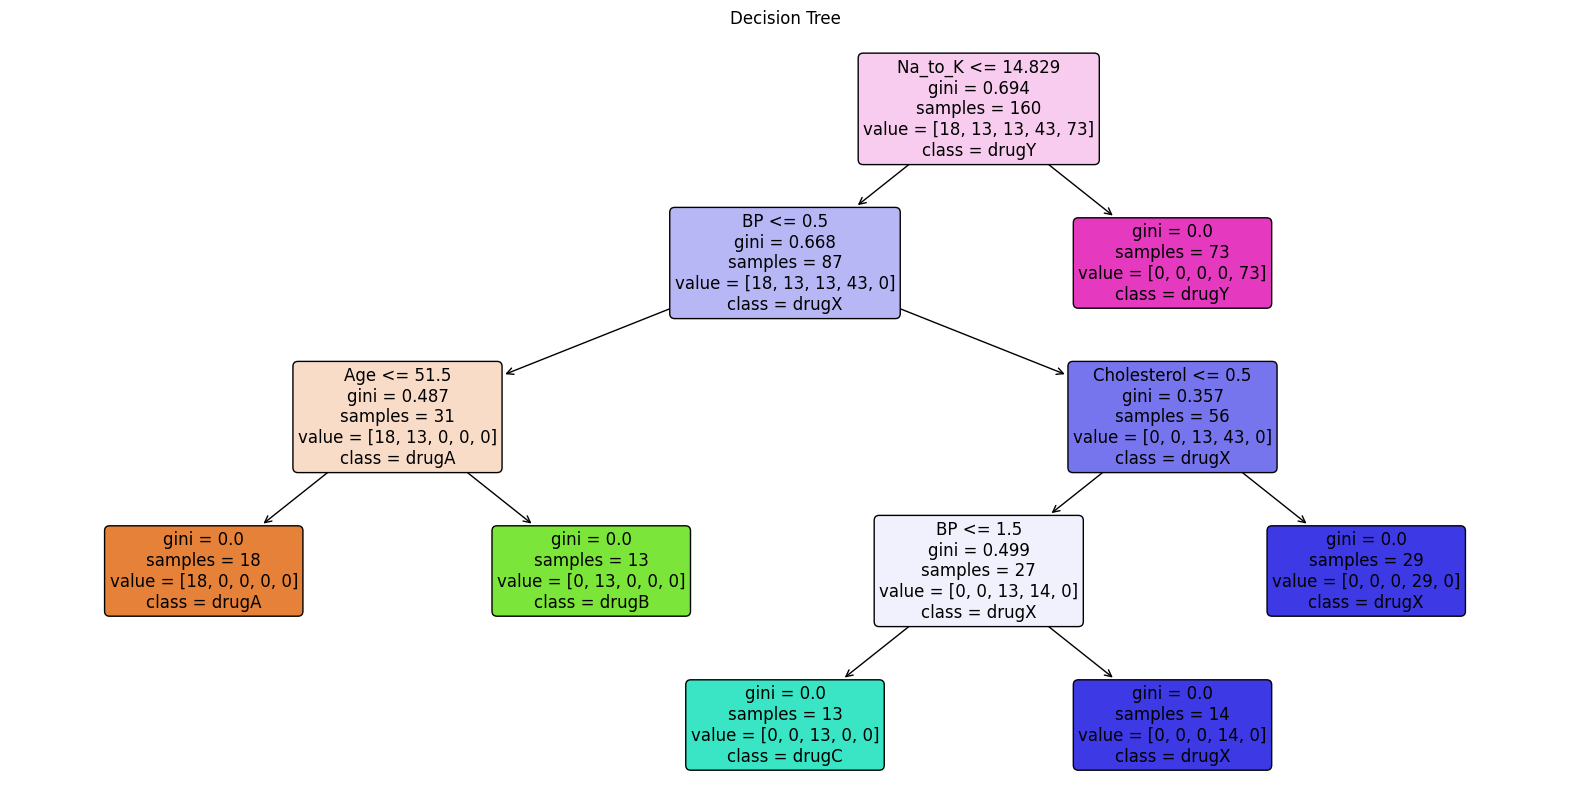

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=le_drug.classes_,
               filled=True,
               rounded=True,
               fontsize=12)
plt.title("Decision Tree")
plt.show()

In [ ]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 11 nodes and has the following tree structure:

node=0 is a split node with value=[[18. 13. 13. 43. 73.]]: go to node 1 if X[:, 4] <= 14.828500270843506 else to node 10.
	node=1 is a split node with value=[[18. 13. 13. 43.  0.]]: go to node 2 if X[:, 2] <= 0.5 else to node 5.
		node=2 is a split node with value=[[18. 13.  0.  0.  0.]]: go to node 3 if X[:, 0] <= 51.5 else to node 4.
			node=3 is a leaf node with value=[[18.  0.  0.  0.  0.]].
			node=4 is a leaf node with value=[[ 0. 13.  0.  0.  0.]].
		node=5 is a split node with value=[[ 0.  0. 13. 43.  0.]]: go to node 6 if X[:, 3] <= 0.5 else to node 9.
			node=6 is a split node with value=[[ 0.  0. 13. 14.  0.]]: go to node 7 if X[:, 2] <= 1.5 else to node 8.
				node=7 is a leaf node with value=[[ 0.  0. 13.  0.  0.]].
				node=8 is a leaf node with value=[[ 0.  0.  0. 14.  0.]].
			node=9 is a leaf node with value=[[ 0.  0.  0. 29.  0.]].
	node=10 is a leaf node with value=[[ 0.  0.  0.  0. 73.]].


## section 2

### model 2

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split = 30, max_features = 'sqrt', max_leaf_nodes = 4, random_state = 54)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"actuall labels: \n {y_test} \n predicted labels:\n {y_pred}")

actuall labels: 
 [4 4 1 4 0 4 3 3 3 0 0 3 4 2 1 4 4 3 4 3 4 4 0 0 2 4 2 4 4 3 3 4 4 4 3 4 3
 3 4 1] 
 predicted labels:
 [4 4 0 4 0 4 3 3 3 0 0 3 4 3 0 4 4 3 4 3 4 4 0 0 3 4 3 4 4 3 3 4 4 4 3 4 3
 3 4 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.79      1.00      0.88        11
           4       1.00      1.00      1.00        18

    accuracy                           0.85        40
   macro avg       0.48      0.60      0.53        40
weighted avg       0.74      0.85      0.79        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


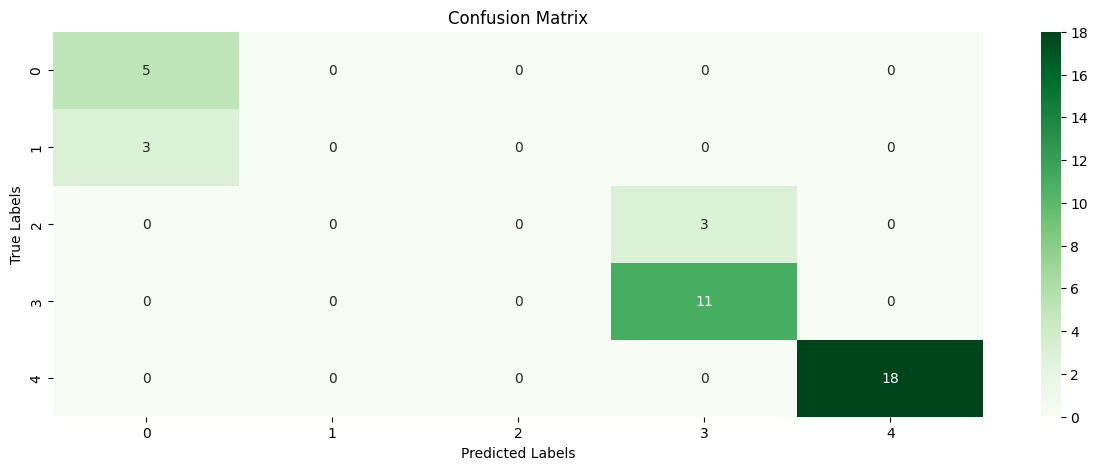

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

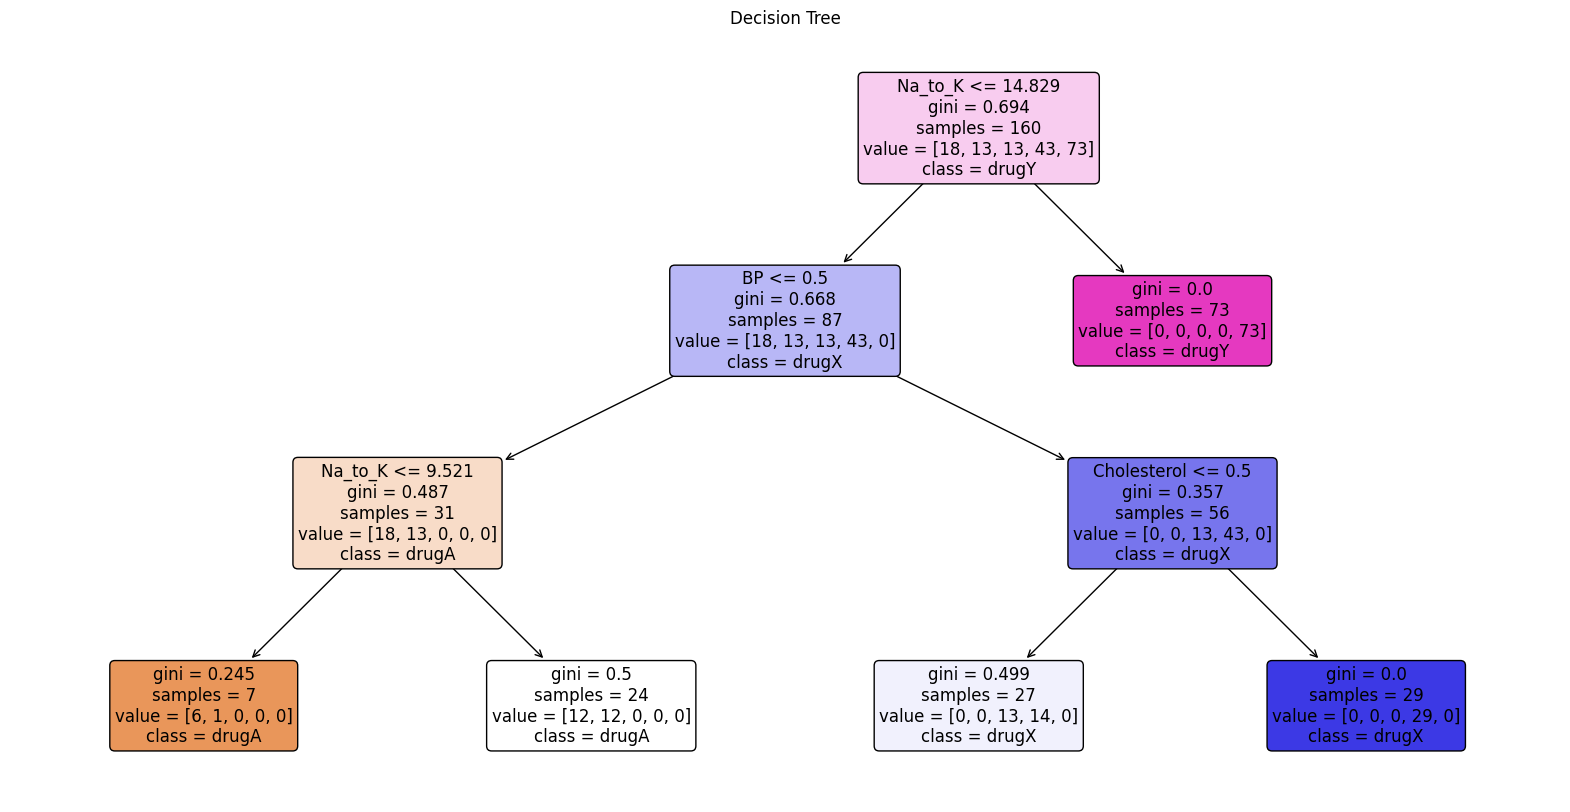

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=le_drug.classes_,
               filled=True,
               rounded=True,
               fontsize=12)
plt.title("Decision Tree")
plt.show()

In [ ]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node with value=[[18. 13. 13. 43. 73.]]: go to node 1 if X[:, 4] <= 14.828500270843506 else to node 2.
	node=1 is a split node with value=[[18. 13. 13. 43.  0.]]: go to node 3 if X[:, 2] <= 0.5 else to node 4.
	node=2 is a leaf node with value=[[ 0.  0.  0.  0. 73.]].
		node=3 is a split node with value=[[18. 13.  0.  0.  0.]]: go to node 7 if X[:, 4] <= 9.521000385284424 else to node 8.
		node=4 is a split node with value=[[ 0.  0. 13. 43.  0.]]: go to node 5 if X[:, 3] <= 0.5 else to node 6.
			node=5 is a leaf node with value=[[ 0.  0. 13. 14.  0.]].
			node=6 is a leaf node with value=[[ 0.  0.  0. 29.  0.]].
			node=7 is a leaf node with value=[[6. 1. 0. 0. 0.]].
			node=8 is a leaf node with value=[[12. 12.  0.  0.  0.]].


### model 3

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split = 2, max_features = 5, max_leaf_nodes = 10, random_state = 54)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"actuall labels: \n {y_test} \n predicted labels:\n {y_pred}")

actuall labels: 
 [4 4 1 4 0 4 3 3 3 0 0 3 4 2 1 4 4 3 4 3 4 4 0 0 2 4 2 4 4 3 3 4 4 4 3 4 3
 3 4 1] 
 predicted labels:
 [4 4 1 4 0 4 3 3 3 0 0 3 4 2 0 4 4 3 4 3 4 4 0 0 2 4 2 4 4 3 3 4 4 4 3 4 3
 3 4 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



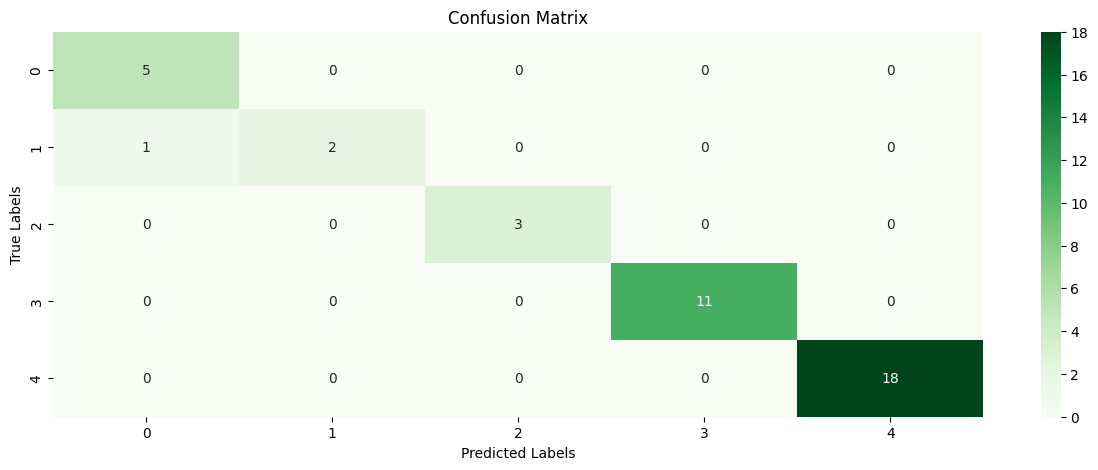

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

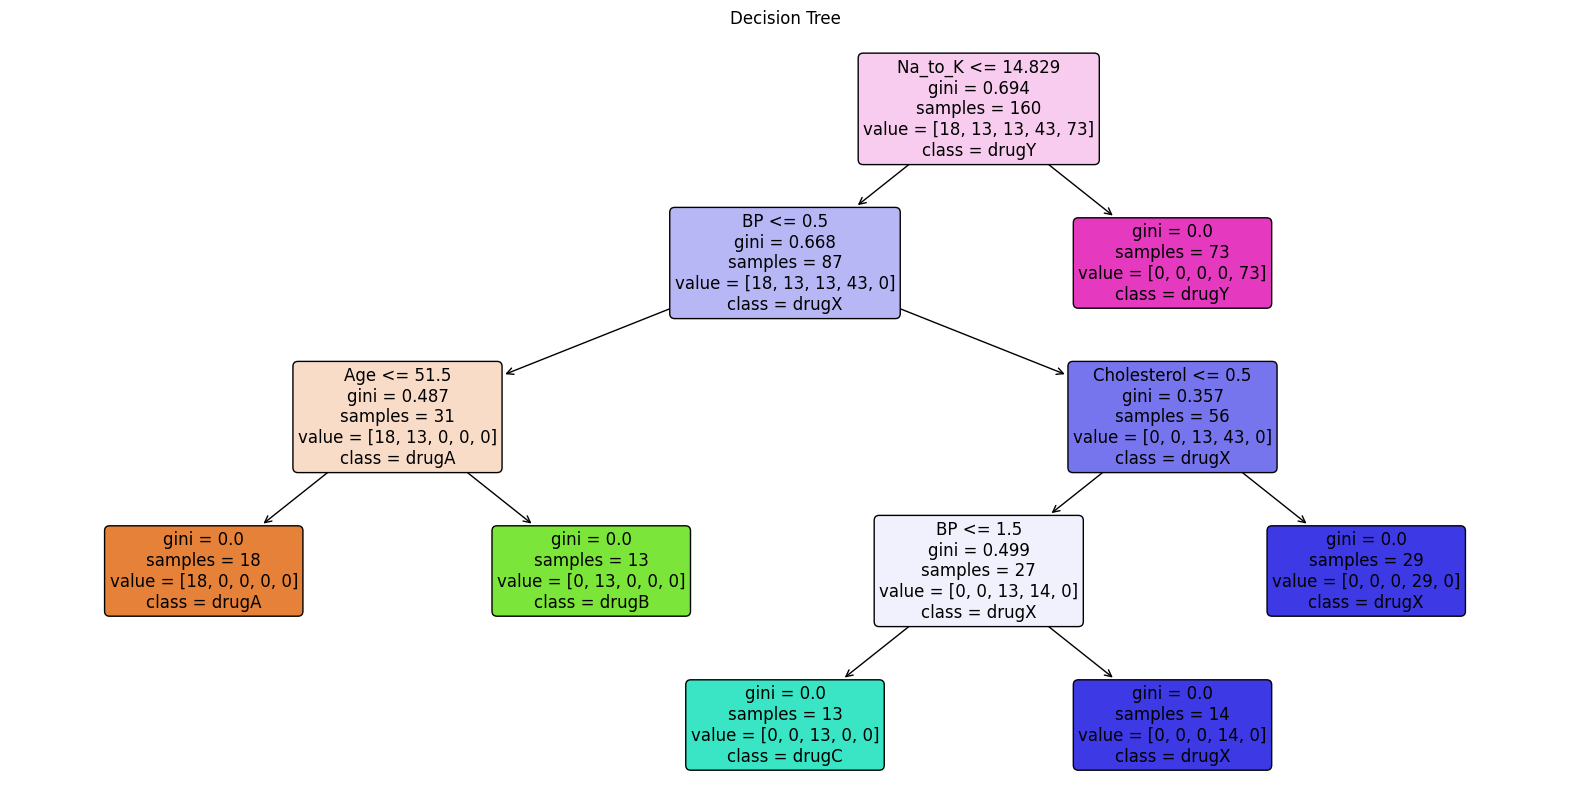

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=le_drug.classes_,
               filled=True,
               rounded=True,
               fontsize=12)
plt.title("Decision Tree")
plt.show()

In [ ]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 11 nodes and has the following tree structure:

node=0 is a split node with value=[[18. 13. 13. 43. 73.]]: go to node 1 if X[:, 4] <= 14.828500270843506 else to node 2.
	node=1 is a split node with value=[[18. 13. 13. 43.  0.]]: go to node 3 if X[:, 2] <= 0.5 else to node 4.
	node=2 is a leaf node with value=[[ 0.  0.  0.  0. 73.]].
		node=3 is a split node with value=[[18. 13.  0.  0.  0.]]: go to node 5 if X[:, 0] <= 51.5 else to node 6.
		node=4 is a split node with value=[[ 0.  0. 13. 43.  0.]]: go to node 7 if X[:, 3] <= 0.5 else to node 8.
			node=5 is a leaf node with value=[[18.  0.  0.  0.  0.]].
			node=6 is a leaf node with value=[[ 0. 13.  0.  0.  0.]].
			node=7 is a split node with value=[[ 0.  0. 13. 14.  0.]]: go to node 9 if X[:, 2] <= 1.5 else to node 10.
			node=8 is a leaf node with value=[[ 0.  0.  0. 29.  0.]].
				node=9 is a leaf node with value=[[ 0.  0. 13.  0.  0.]].
				node=10 is a leaf node with value=[[ 0.  0.  0. 14.  0.]].


### model 4

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split = 2, max_features = 4, ccp_alpha = 0.07, random_state = 54)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"actuall labels: \n {y_test} \n predicted labels:\n {y_pred}")

actuall labels: 
 [4 4 1 4 0 4 3 3 3 0 0 3 4 2 1 4 4 3 4 3 4 4 0 0 2 4 2 4 4 3 3 4 4 4 3 4 3
 3 4 1] 
 predicted labels:
 [4 4 1 4 0 4 3 3 3 0 0 3 4 3 0 4 4 3 4 3 4 4 0 0 3 4 3 4 4 3 3 4 4 4 3 4 3
 3 4 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         3
           3       0.79      1.00      0.88        11
           4       1.00      1.00      1.00        18

    accuracy                           0.90        40
   macro avg       0.72      0.73      0.72        40
weighted avg       0.85      0.90      0.87        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


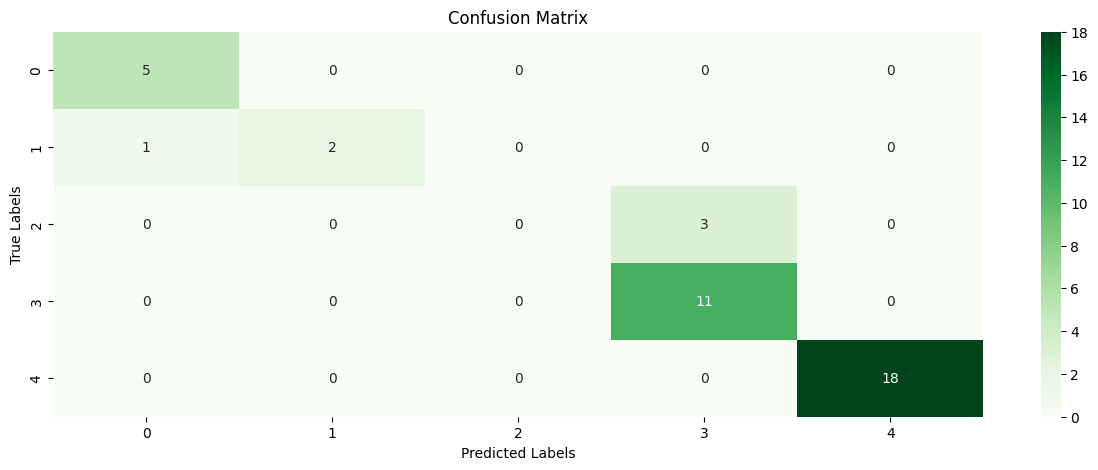

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

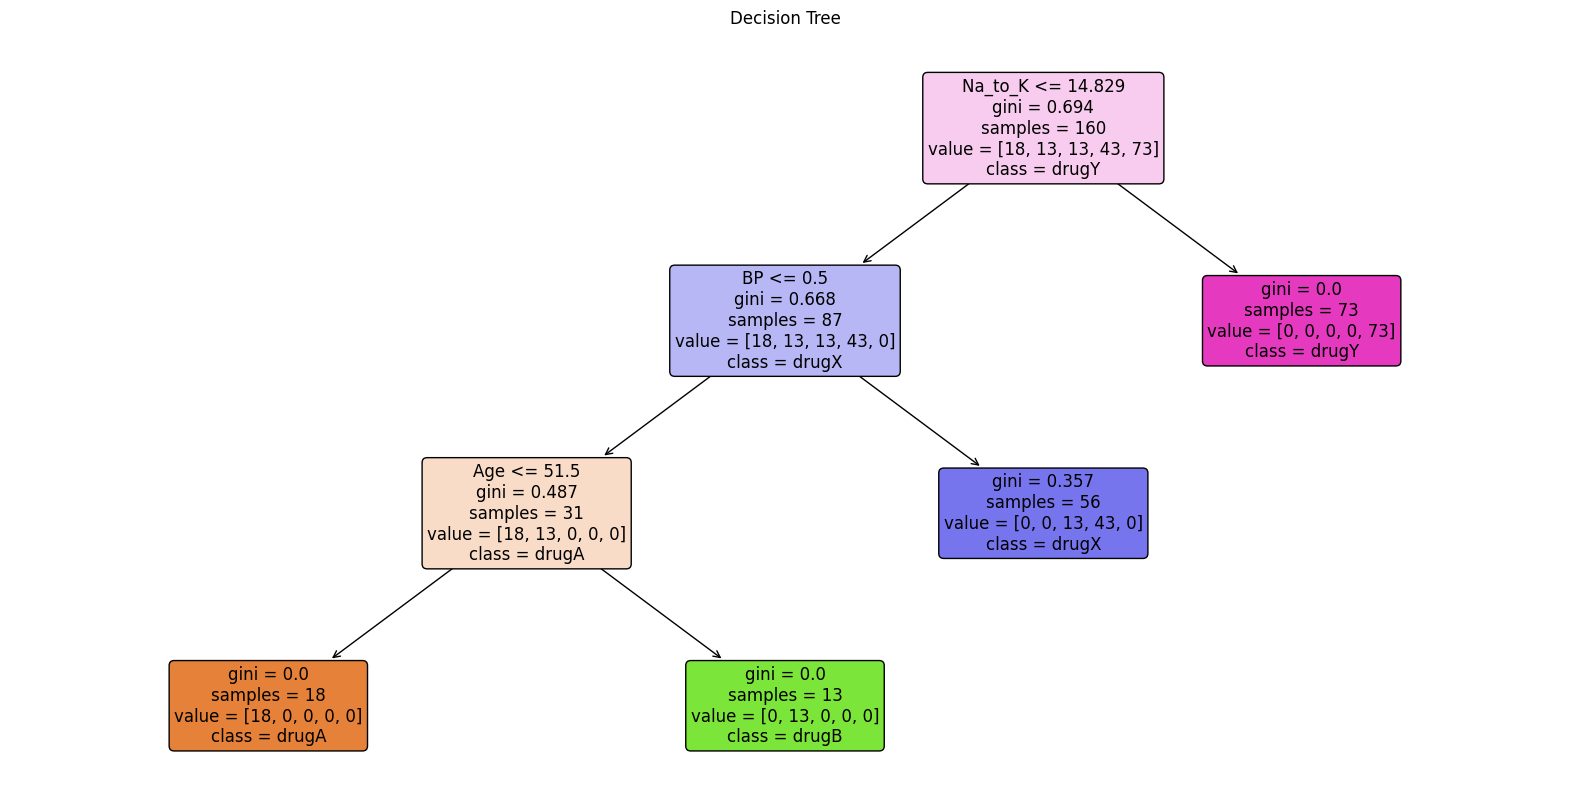

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=le_drug.classes_,
               filled=True,
               rounded=True,
               fontsize=12)
plt.title("Decision Tree")
plt.show()

In [ ]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node with value=[[18. 13. 13. 43. 73.]]: go to node 1 if X[:, 4] <= 14.828500270843506 else to node 6.
	node=1 is a split node with value=[[18. 13. 13. 43.  0.]]: go to node 2 if X[:, 2] <= 0.5 else to node 5.
		node=2 is a split node with value=[[18. 13.  0.  0.  0.]]: go to node 3 if X[:, 0] <= 51.5 else to node 4.
			node=3 is a leaf node with value=[[18.  0.  0.  0.  0.]].
			node=4 is a leaf node with value=[[ 0. 13.  0.  0.  0.]].
		node=5 is a leaf node with value=[[ 0.  0. 13. 43.  0.]].
	node=6 is a leaf node with value=[[ 0.  0.  0.  0. 73.]].


## section 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf_rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 10, max_features = 5, random_state = 54, verbose = True)
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

print(f"Actual labels: \n{y_test}\n")
print(f"Predicted labels:\n{y_pred}\n")

print(classification_report(y_test, y_pred))

Actual labels: 
[4 4 1 4 0 4 3 3 3 0 0 3 4 2 1 4 4 3 4 3 4 4 0 0 2 4 2 4 4 3 3 4 4 4 3 4 3
 3 4 1]

Predicted labels:
[4 4 1 4 0 4 3 3 3 0 0 3 4 2 0 4 4 3 4 3 4 4 0 0 2 4 2 4 4 3 3 4 4 4 3 4 3
 3 4 1]

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier(random_state=42)
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Test Accuracy: 0.85


# Question 4

### read the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# https://drive.google.com/file/d/1fhEmPddifZkJV5r5C5-_Ab4h6yJkhNP_/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 1fhEmPddifZkJV5r5C5-_Ab4h6yJkhNP_

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1fhEmPddifZkJV5r5C5-_Ab4h6yJkhNP_
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 46.7MB/s]


In [ ]:
data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### EDA

In [ ]:
data.shape

(1025, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


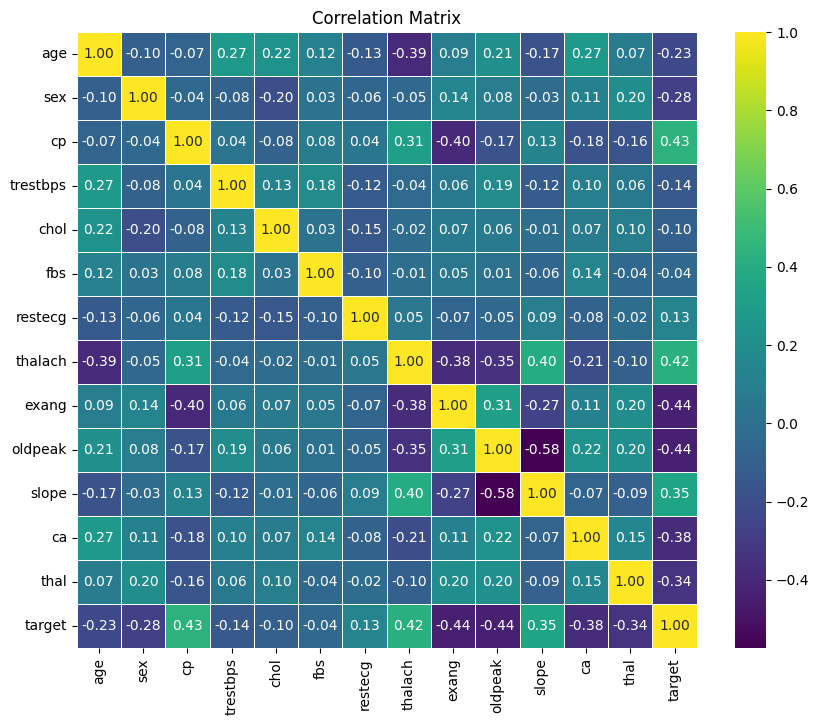

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Feature correlations with target:
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


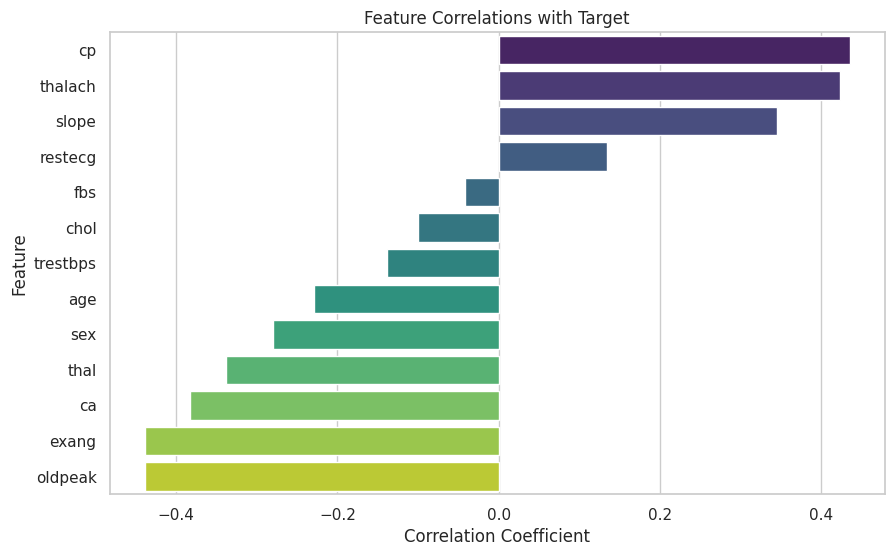

In [ ]:
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

data_combined = X.copy()
data_combined['target'] = y

correlation_matrix = data_combined.corr()
correlation_with_target = correlation_matrix['target'].drop('target')
sorted_correlations = correlation_with_target.sort_values(ascending=False)

print("Feature correlations with target:")
print(sorted_correlations)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


In [ ]:
proportion = len(data[data['target'] == 1]) / len(data['target'])
print(f"The percentage of label 1 in the whole data is {proportion:.2f} thus dataset is balanced")

The percentage of label 1 in the whole data is 0.51 thus dataset is balanced


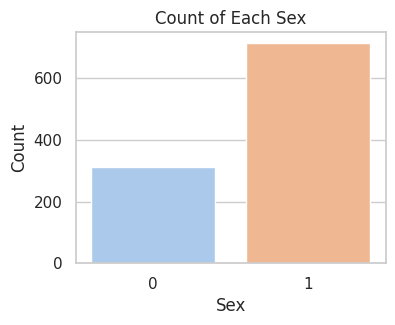

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 3))
ax = sns.countplot(x="sex", data=data, palette="pastel")

ax.set_title("Count of Each Sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
plt.show()

In [ ]:
data.groupby('sex')['age'].value_counts()

sex  age
0    62     24
     58     21
     63     17
     54     15
     55     15
            ..
1    69      6
     29      4
     34      3
     37      3
     77      3
Name: count, Length: 73, dtype: int64

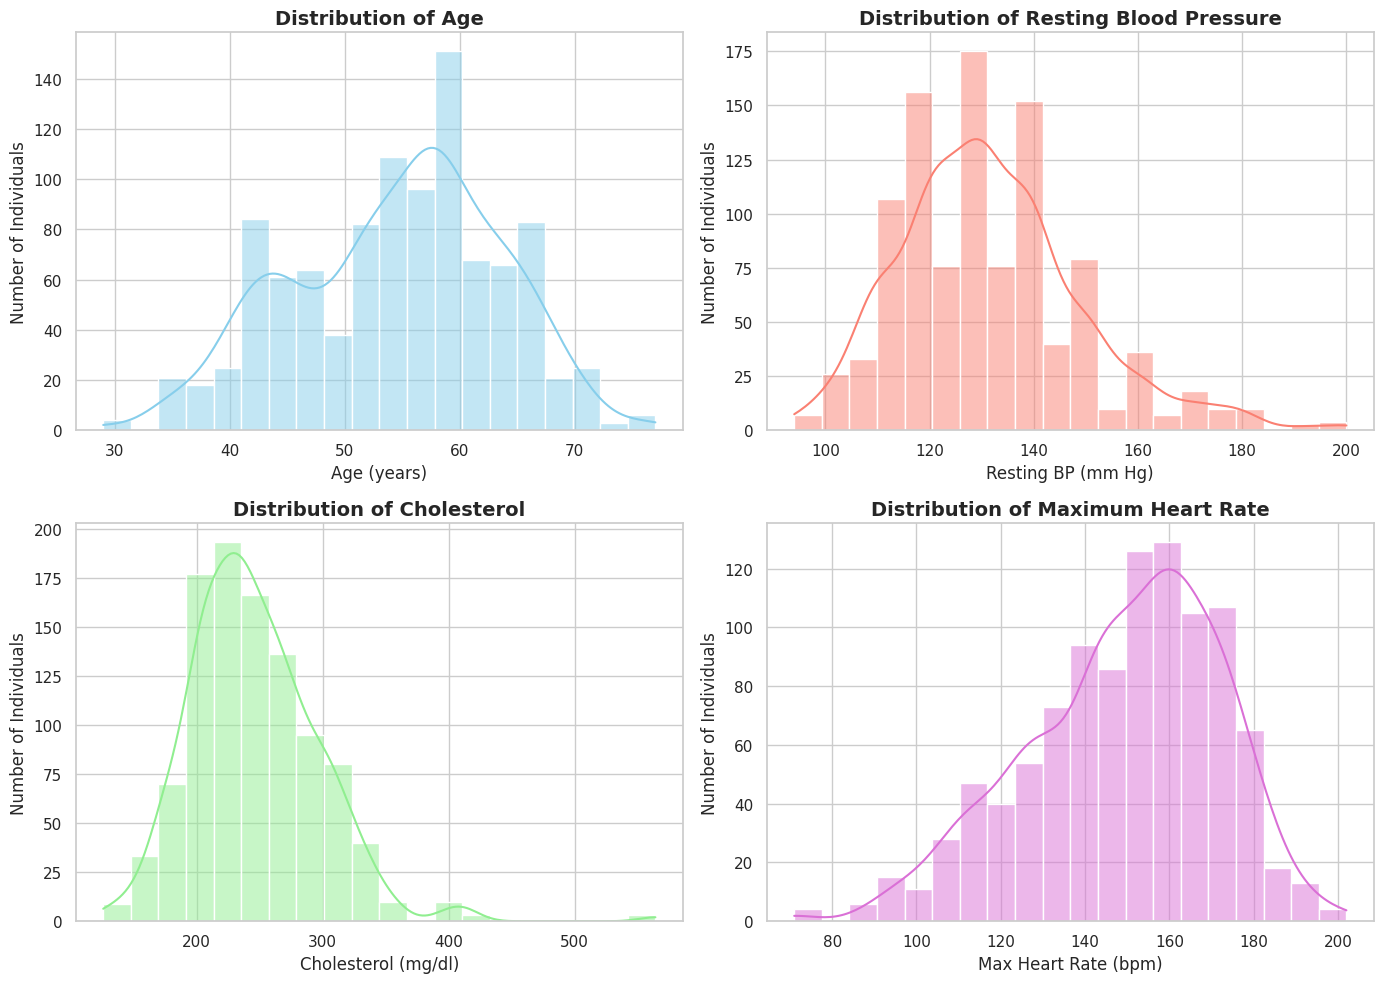

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for the plots
sns.set(style="whitegrid")

# Create a 2x2 grid of plots with customized size
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Age Distribution
sns.histplot(data=data, x='age', kde=True, ax=axs[0, 0], color="skyblue", bins=20)
axs[0, 0].set_title('Distribution of Age', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Age (years)', fontsize=12)
axs[0, 0].set_ylabel('Number of Individuals', fontsize=12)

# Plot 2: Resting Blood Pressure Distribution
sns.histplot(data=data, x='trestbps', kde=True, ax=axs[0, 1], color="salmon", bins=20)
axs[0, 1].set_title('Distribution of Resting Blood Pressure', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Resting BP (mm Hg)', fontsize=12)
axs[0, 1].set_ylabel('Number of Individuals', fontsize=12)

# Plot 3: Cholesterol Distribution
sns.histplot(data=data, x='chol', kde=True, ax=axs[1, 0], color="lightgreen", bins=20)
axs[1, 0].set_title('Distribution of Cholesterol', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Cholesterol (mg/dl)', fontsize=12)
axs[1, 0].set_ylabel('Number of Individuals', fontsize=12)

# Plot 4: Max Heart Rate Distribution
sns.histplot(data=data, x='thalach', kde=True, ax=axs[1, 1], color="orchid", bins=20)
axs[1, 1].set_title('Distribution of Maximum Heart Rate', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Max Heart Rate (bpm)', fontsize=12)
axs[1, 1].set_ylabel('Number of Individuals', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


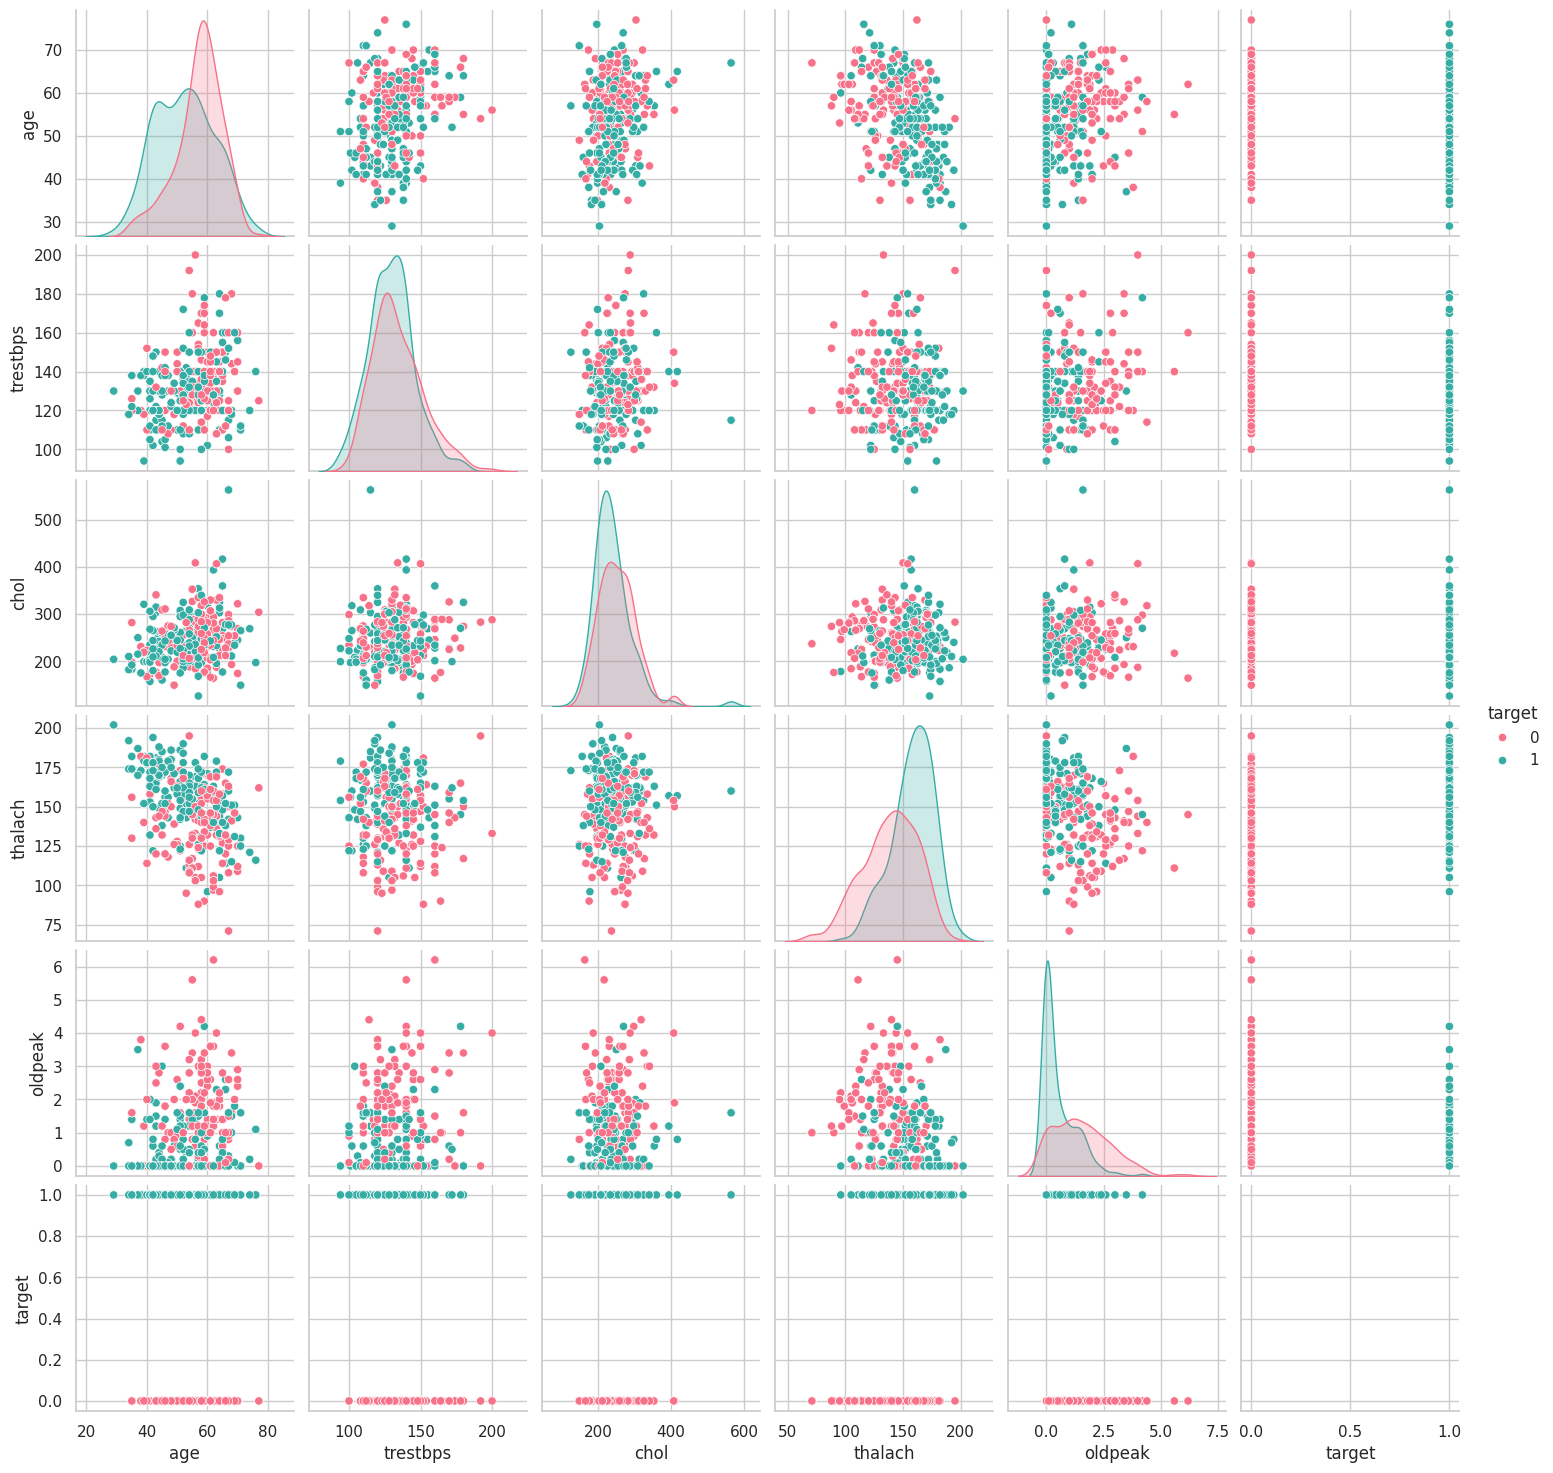

In [ ]:
# sample_size = 600
# sample = data.sample(sample_size)
# features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
# sns.pairplot(sample, vars=features, hue='target', palette="husl")
# plt.show()

### train-test split

In [ ]:
X = data.drop(['target'], axis = 1)
y = data['target']
X.shape, y.shape

((1025, 13), (1025,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((820, 13), (820,), (205, 13), (205,))

### preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.38471781,  0.66417225,  1.03718762, ..., -0.58884277,
        -0.73973205,  1.09052316],
       [-0.17088029,  0.66417225,  1.03718762, ...,  1.01000184,
         2.13052166, -0.51780236],
       [-1.2820765 ,  0.66417225, -0.900156  , ..., -0.58884277,
        -0.73973205,  1.09052316],
       ...,
       [ 0.94031591, -1.50563351,  1.03718762, ...,  1.01000184,
        -0.73973205, -0.51780236],
       [ 0.16247857,  0.66417225,  0.06851581, ..., -2.18768738,
        -0.73973205, -0.51780236],
       [-1.39319612, -1.50563351, -0.900156  , ..., -0.58884277,
        -0.73973205, -0.51780236]])

### Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
SKNB = GaussianNB()
SKNB.fit(X_train, y_train)
y_pred = SKNB.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        91
           1       0.83      0.88      0.85       114

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



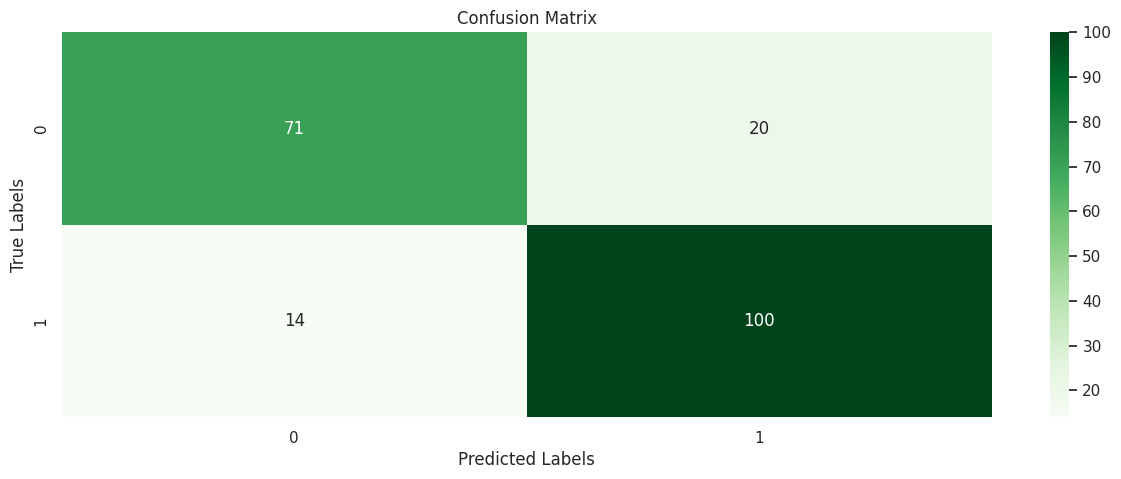

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [ ]:
MyNB = NaiveBayes()
MyNB.fit(X_train, y_train.ravel())
pred_my = MyNB.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_report = classification_report(y_test, pred_my)
print(model_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        91
           1       0.83      0.88      0.85       114

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



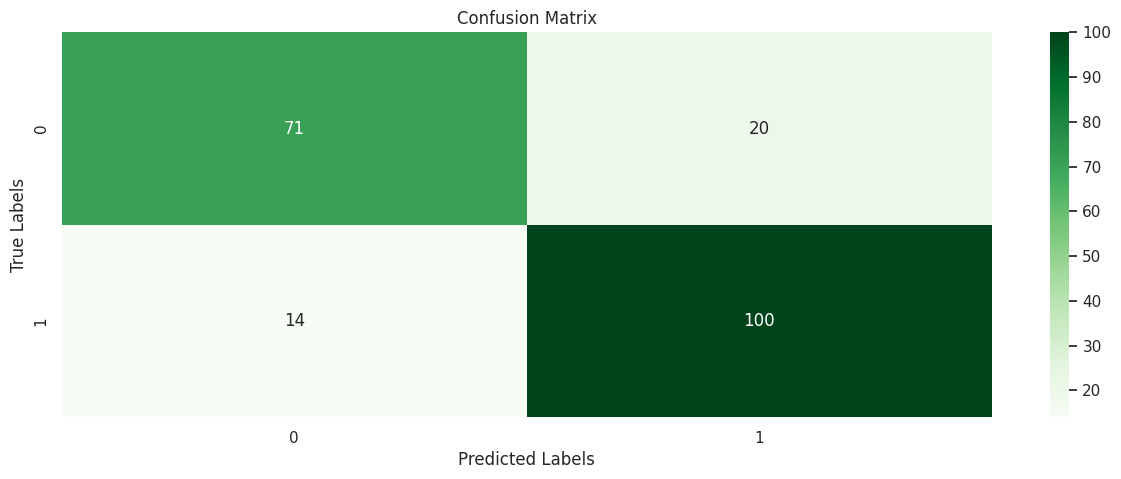

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test, pred_my)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

In [ ]:
import random
random_indices = random.sample(range(len(y_test)), 5)

print('True labels:', y_test.iloc[random_indices].values)
print('Predicted labels:', y_pred[random_indices])

True labels: [0 1 1 0 1]
Predicted labels: [0 1 1 0 0]


In [ ]:
print(random_indices)

[169, 154, 74, 23, 21]
